## Part 1: Install and Import Necessary Modules

In [2]:
##dont always need to run
!pip install plotnine
!pip install matplotlib==3.8.3
##need this for ggplot thingsss
!pip install scikit-misc
## need scikit-misc for loess calc in ggplot statsmooth
!pip install seaborn
## need for seaborn sns plots
!pip install --upgrade seaborn matplotlib
## correlation matrix does not work with the old matplotlib, but I also want my ggplot to work

  Using cached plotnine-0.14.5-py3-none-any.whl.metadata (9.3 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached mizani-0.13.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached numpy-2.2.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached plotnine-0.14.5-py3-none-any.whl (1.3 MB)
Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached mizani-0.13.1-py3-none-any.whl (127 kB)
Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing inst

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from plotnine import *
from plotnine.data import *
from skmisc import *
import seaborn as sns
import re
import warnings 
warnings.filterwarnings('ignore') 

## Part 2: Import Data

In [3]:
kelp_rcca = pd.read_csv('Algae_California_raw_2024.csv')
kelp_rcca

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Stipes,Distance
0,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,Bull Kelp,0,NaN,30.0
1,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,Giant Kelp,0,0.0,30.0
2,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,Laminaria Spp,0,NaN,30.0
3,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,Southern Sea Palm >30,0,NaN,30.0
4,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,Woody Kelp,0,NaN,30.0
...,...,...,...,...,...,...,...,...,...,...,...
110130,Yellowbanks,33.998798,-119.550499,2013,2013-11-07,22.0,6,Giant Kelp,1,15.0,30.0
110131,Yellowbanks,33.998798,-119.550499,2013,2013-11-07,22.0,6,Giant Kelp,1,22.0,30.0
110132,Yellowbanks,33.998798,-119.550499,2013,2013-11-07,22.0,6,Laminaria Spp,5,NaN,30.0
110133,Yellowbanks,33.998798,-119.550499,2013,2013-11-07,22.0,6,Southern Sea Palm >30,0,NaN,30.0


## Part 3: EDA
### Check Point 1: Data Frames and Sites

In [4]:
kelp_rcca['Area_m2'] = kelp_rcca.Distance * 2
kelp_rcca.Date = pd.to_datetime(kelp_rcca.Date)
kelp_rcca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110135 entries, 0 to 110134
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Site       110135 non-null  object        
 1   Latitude   110135 non-null  float64       
 2   Longitude  110135 non-null  float64       
 3   Year       110135 non-null  int64         
 4   Date       110135 non-null  datetime64[ns]
 5   Depth_ft   107885 non-null  float64       
 6   Transect   110135 non-null  int64         
 7   Classcode  110135 non-null  object        
 8   Amount     110135 non-null  int64         
 9   Stipes     55977 non-null   float64       
 10  Distance   110125 non-null  float64       
 11  Area_m2    110125 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 10.1+ MB


**To calculate the density of kelp species, it is best to use either the stipes or the amount of holdfasts counted in the transect depending on the species**

In [5]:
kelp_rcca.isna().sum()

Site             0
Latitude         0
Longitude        0
Year             0
Date             0
Depth_ft      2250
Transect         0
Classcode        0
Amount           0
Stipes       54158
Distance        10
Area_m2         10
dtype: int64

In [6]:
kelp_rcca.groupby('Classcode')['Stipes'].count()

Classcode
Bull Kelp                    0
Feather Boa Kelp          4992
Giant Kelp               50985
Laminaria Spp                0
No Blade Kelp                0
Oar Kelp                     0
Sargassum Horneri            0
Southern Sea Palm <30        0
Southern Sea Palm >30        0
Torn Kelp                    0
Woody Kelp                   0
Name: Stipes, dtype: int64

**We can see here there the only species that this will concern are feather boa kelp and giant kelp**

**But are they even in our sites of interest?**

**First need to make dataframe for sites of interest, then need to identify items with counts**

**Best to start similarly as Analysis 1: Invert, and first make all dataframes for sites of Interest, then investigate species**

In [7]:
ftbrgg_kelp_rcca = kelp_rcca[(kelp_rcca.Latitude<= 40) & (kelp_rcca.Latitude>=39)]
ftbrgg_kelp_rcca.head(3)

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Stipes,Distance,Area_m2
2538,Albion Cove,39.22778,-123.77261,2018,2018-05-08,21.0,1,Bull Kelp,0,NaN,30.0,60.0
2539,Albion Cove,39.22778,-123.77261,2018,2018-05-08,21.0,1,Feather Boa Kelp,0,0.0,30.0,60.0
2540,Albion Cove,39.22778,-123.77261,2018,2018-05-08,21.0,1,Giant Kelp,0,0.0,30.0,60.0


In [8]:
ftbrgg_kelp_rcca.Site.unique()
## Same sites as invert

array(['Albion Cove', 'Caspar North', 'Caspar South', 'Frolic Cove',
       'Glass Beach', 'MacKerricher North', 'Mendocino Headlands',
       'Portuguese Beach', 'Russian Gulch', 'Van Damme'], dtype=object)

In [9]:
caspar_kelp = kelp_rcca[kelp_rcca.Site.str.contains('Caspar')]
caspar_kelp.head(3)

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Stipes,Distance,Area_m2
18593,Caspar North,39.364647,-123.822133,2014,2014-09-06,34.0,1,Bull Kelp,0,NaN,30.0,60.0
18594,Caspar North,39.364647,-123.822133,2014,2014-09-06,34.0,1,Giant Kelp,0,0.0,30.0,60.0
18595,Caspar North,39.364647,-123.822133,2014,2014-09-06,34.0,1,Laminaria Spp,0,NaN,30.0,60.0


In [10]:
caspar_north_kelp = kelp_rcca[kelp_rcca.Site.str.contains('Caspar North')]
caspar_north_kelp.head(3)

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Stipes,Distance,Area_m2
18593,Caspar North,39.364647,-123.822133,2014,2014-09-06,34.0,1,Bull Kelp,0,NaN,30.0,60.0
18594,Caspar North,39.364647,-123.822133,2014,2014-09-06,34.0,1,Giant Kelp,0,0.0,30.0,60.0
18595,Caspar North,39.364647,-123.822133,2014,2014-09-06,34.0,1,Laminaria Spp,0,NaN,30.0,60.0


In [11]:
caspar_south_kelp = kelp_rcca[kelp_rcca.Site.str.contains('Caspar South')]
caspar_south_kelp.head(3)

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Stipes,Distance,Area_m2
19531,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Bull Kelp,73,NaN,30.0,60.0
19532,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Giant Kelp,0,0.0,30.0,60.0
19533,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Laminaria Spp,4,NaN,30.0,60.0


**Analysis 1 showed that Portuguese Beach had similar biodiversity to Caspar before and after MHWs. Will be including it in initial analysis, with the prediction that the kelp will also show similarities.**

In [12]:
port_kelp = kelp_rcca[kelp_rcca.Site.str.contains('Portuguese')]
port_kelp.head(3)

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Stipes,Distance,Area_m2
83150,Portuguese Beach,39.302264,-123.803283,2007,2007-10-07,29.0,1,Bull Kelp,17,NaN,30.0,60.0
83151,Portuguese Beach,39.302264,-123.803283,2007,2007-10-07,29.0,1,Giant Kelp,0,0.0,30.0,60.0
83152,Portuguese Beach,39.302264,-123.803283,2007,2007-10-07,29.0,1,Laminaria Spp,50,NaN,30.0,60.0


In [13]:
kelp_rcca_species = set(kelp_rcca[kelp_rcca.Amount!=0].Classcode.unique())

caspar_kelp_species = set(caspar_kelp[caspar_kelp.Amount!=0].Classcode.unique())

caspar_north_kelp_species = set(caspar_north_kelp[caspar_kelp.Amount!=0].Classcode.unique())

caspar_south_kelp_species = set(caspar_south_kelp[caspar_kelp.Amount!=0].Classcode.unique())

port_kelp_species = set(port_kelp[port_kelp.Amount!=0].Classcode.unique())

print('RCCA Kelp Species:', kelp_rcca_species,
      '\n\n Caspar Kelp Species:',caspar_kelp_species,
     '\n\n Caspar North Kelp Species:', caspar_north_kelp_species,
      '\n\n Caspar South Kelp Species:', caspar_south_kelp_species,
     '\n\n Portuguese Beach Kelp Species:', port_kelp_species)

RCCA Kelp Species: {'Torn Kelp', 'Woody Kelp', 'Southern Sea Palm >30', 'Oar Kelp', 'Giant Kelp', 'Laminaria Spp', 'Sargassum Horneri', 'No Blade Kelp', 'Bull Kelp', 'Southern Sea Palm <30', 'Feather Boa Kelp'} 

 Caspar Kelp Species: {'Laminaria Spp', 'Woody Kelp', 'No Blade Kelp', 'Bull Kelp'} 

 Caspar North Kelp Species: {'Woody Kelp', 'Bull Kelp'} 

 Caspar South Kelp Species: {'Laminaria Spp', 'Woody Kelp', 'No Blade Kelp', 'Bull Kelp'} 

 Portuguese Beach Kelp Species: {'Torn Kelp', 'Woody Kelp', 'Laminaria Spp', 'Giant Kelp', 'No Blade Kelp', 'Bull Kelp', 'Feather Boa Kelp'}


**Looks like Portuguese Beach has greater kelp richness (number of species) than Caspar North (and caspar overall), but how far back does each data set go?**

In [14]:
print(port_kelp.Date.min(),caspar_north_kelp.Date.min())

2007-10-07 00:00:00 2014-09-06 00:00:00


**In Analysis 1, we saw that Caspar North had a relatively high Simpsons Biodiversity Index for the Invertebrate species. With this in mind, I think it is unlikely that the lack of kelp at Caspar North is due to MHW that hit prior to analysis.**

**Will not be creating dataframes for individual species of interest, AT THIS POINT IN TIME**



## To get kelp density:
1.  For kelp rcca, group by Site, Date, and Classcode. Get the sum of Amount, Stipes, Distance, and Area_m2. Put this into kelp_rcca_group
2.  Create new column "Total" that is either amount or stipes, depending on which is greater. Put it into the dataframe in a logical order. 
3. Want to take the Total per Classcode, Date, Site (keep Year too) and divide it by the Area_m2 of that same row to get the kelp density of each specific species to that site on that day. Add this as a new column, "Species_Density."

# #1

In [15]:
kelp_rcca_group = kelp_rcca.groupby(['Site','Date','Year','Classcode','Latitude'])[['Amount','Stipes','Distance','Area_m2']].sum().reset_index()
kelp_rcca_group.head(12)

,Site,Date,Year,Classcode,Latitude,Amount,Stipes,Distance,Area_m2
0,120 Reef,2006-10-01,2006,Bull Kelp,33.737919,0,0.0,180.0,360.0
1,120 Reef,2006-10-01,2006,Giant Kelp,33.737919,9,63.0,360.0,720.0
2,120 Reef,2006-10-01,2006,Laminaria Spp,33.737919,0,0.0,180.0,360.0
3,120 Reef,2006-10-01,2006,Southern Sea Palm >30,33.737919,0,0.0,180.0,360.0
4,120 Reef,2006-10-01,2006,Woody Kelp,33.737919,0,0.0,180.0,360.0
5,120 Reef,2007-08-19,2007,Bull Kelp,33.737919,0,0.0,180.0,360.0
6,120 Reef,2007-08-19,2007,Giant Kelp,33.737919,34,256.0,690.0,1380.0
7,120 Reef,2007-08-19,2007,Laminaria Spp,33.737919,0,0.0,180.0,360.0
8,120 Reef,2007-08-19,2007,Southern Sea Palm >30,33.737919,1,0.0,180.0,360.0
9,120 Reef,2007-08-19,2007,Woody Kelp,33.737919,3,0.0,180.0,360.0


# #2

In [16]:

kelp_rcca_group[['Amount','Stipes']].max(axis=1)

0          0.0
1         63.0
2          0.0
3          0.0
4          0.0
         ...  
11342      0.0
11343    574.0
11344    183.0
11345     17.0
11346    260.0
Length: 11347, dtype: float64

In [17]:
kelp_rcca_group['Total'] = kelp_rcca_group[['Amount','Stipes']].max(axis=1)

In [18]:
kelp_rcca_group.head(3)

,Site,Date,Year,Classcode,Latitude,Amount,Stipes,Distance,Area_m2,Total
0,120 Reef,2006-10-01,2006,Bull Kelp,33.737919,0,0.0,180.0,360.0,0.0
1,120 Reef,2006-10-01,2006,Giant Kelp,33.737919,9,63.0,360.0,720.0,63.0
2,120 Reef,2006-10-01,2006,Laminaria Spp,33.737919,0,0.0,180.0,360.0,0.0


In [19]:
kelp_rcca_group = kelp_rcca_group[['Site','Latitude','Date','Year','Classcode','Amount','Stipes','Total','Distance','Area_m2']]
kelp_rcca_group.head(15)

,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2
0,120 Reef,33.737919,2006-10-01,2006,Bull Kelp,0,0.0,0.0,180.0,360.0
1,120 Reef,33.737919,2006-10-01,2006,Giant Kelp,9,63.0,63.0,360.0,720.0
2,120 Reef,33.737919,2006-10-01,2006,Laminaria Spp,0,0.0,0.0,180.0,360.0
3,120 Reef,33.737919,2006-10-01,2006,Southern Sea Palm >30,0,0.0,0.0,180.0,360.0
4,120 Reef,33.737919,2006-10-01,2006,Woody Kelp,0,0.0,0.0,180.0,360.0
5,120 Reef,33.737919,2007-08-19,2007,Bull Kelp,0,0.0,0.0,180.0,360.0
6,120 Reef,33.737919,2007-08-19,2007,Giant Kelp,34,256.0,256.0,690.0,1380.0
7,120 Reef,33.737919,2007-08-19,2007,Laminaria Spp,0,0.0,0.0,180.0,360.0
8,120 Reef,33.737919,2007-08-19,2007,Southern Sea Palm >30,1,0.0,1.0,180.0,360.0
9,120 Reef,33.737919,2007-08-19,2007,Woody Kelp,3,0.0,3.0,180.0,360.0


# #3

In [20]:
kelp_rcca_group['Species_Density'] = kelp_rcca_group.Total / kelp_rcca_group.Area_m2
kelp_rcca_group.head(15)

,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2,Species_Density
0,120 Reef,33.737919,2006-10-01,2006,Bull Kelp,0,0.0,0.0,180.0,360.0,0.000000
1,120 Reef,33.737919,2006-10-01,2006,Giant Kelp,9,63.0,63.0,360.0,720.0,0.087500
2,120 Reef,33.737919,2006-10-01,2006,Laminaria Spp,0,0.0,0.0,180.0,360.0,0.000000
3,120 Reef,33.737919,2006-10-01,2006,Southern Sea Palm >30,0,0.0,0.0,180.0,360.0,0.000000
4,120 Reef,33.737919,2006-10-01,2006,Woody Kelp,0,0.0,0.0,180.0,360.0,0.000000
5,120 Reef,33.737919,2007-08-19,2007,Bull Kelp,0,0.0,0.0,180.0,360.0,0.000000
6,120 Reef,33.737919,2007-08-19,2007,Giant Kelp,34,256.0,256.0,690.0,1380.0,0.185507
7,120 Reef,33.737919,2007-08-19,2007,Laminaria Spp,0,0.0,0.0,180.0,360.0,0.000000
8,120 Reef,33.737919,2007-08-19,2007,Southern Sea Palm >30,1,0.0,1.0,180.0,360.0,0.002778
9,120 Reef,33.737919,2007-08-19,2007,Woody Kelp,3,0.0,3.0,180.0,360.0,0.008333


What is the maximum Species Density?

In [21]:
kelp_rcca_group.groupby('Classcode')['Species_Density'].max()

Classcode
Bull Kelp                 3.220141
Feather Boa Kelp          0.213864
Giant Kelp                1.375641
Laminaria Spp             3.316327
No Blade Kelp             0.562500
Oar Kelp                  3.678038
Sargassum Horneri        71.250000
Southern Sea Palm <30     1.198071
Southern Sea Palm >30     0.837748
Torn Kelp                 1.419048
Woody Kelp                7.633136
Name: Species_Density, dtype: float64

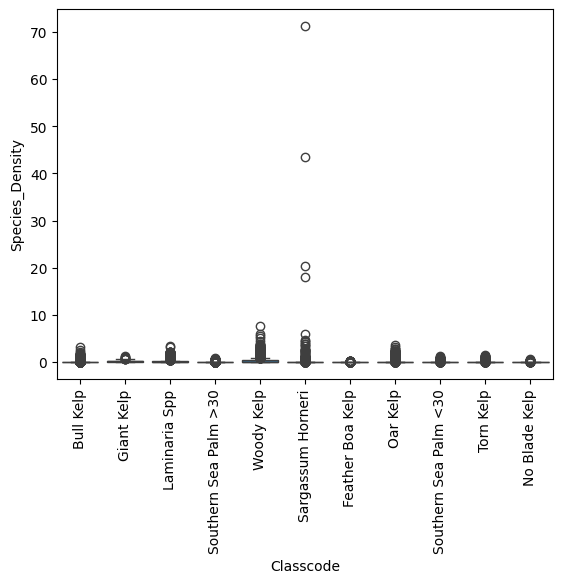

In [22]:
sns.boxplot(kelp_rcca_group, x='Classcode',y='Species_Density')
plt.xticks(rotation=90)
plt.show()

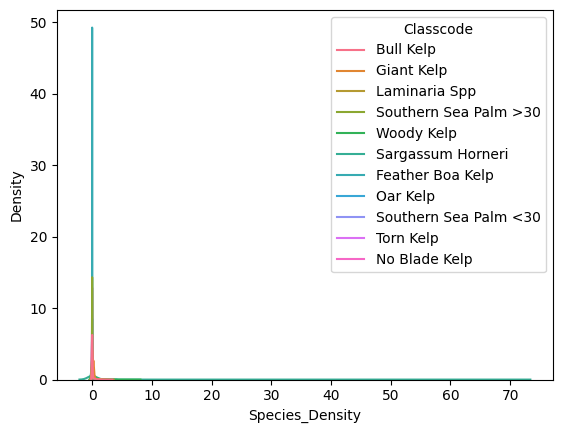

In [23]:
sns.kdeplot(kelp_rcca_group, x='Species_Density', hue='Classcode', common_norm = False)
plt.show()

## **Clearly, Sargassum is making this a little difficult (typical of invasive species)**

### **ANDDDD Zeros are skewwing it a lot**

1. In a new df, create a copy of kelp_rcca_ and remove all 0's in Total
2. Boxplot this, and plot just Bull Kelp, Woody Kelp, Laminaria Spp, and No Blade Kelp
3. KDE plot this, and plot just "...". Decide that you want to "zoom" in on the distrubition and use a violin plt. then look closer again? 
3. Decide that you want to facet by different y axes
    a. Create fig, ax for 2 by 2 plots
    b. one plot with automatic y, one plot for y goes 0-10, another for y goes 0-3, and last for just Bull Kelp, Woody Kelp, Laminaria Spp, and No Blade Kelp

In [24]:
#1
kelp_rcca_nonzero_df = kelp_rcca_group[kelp_rcca_group.Total!=0]

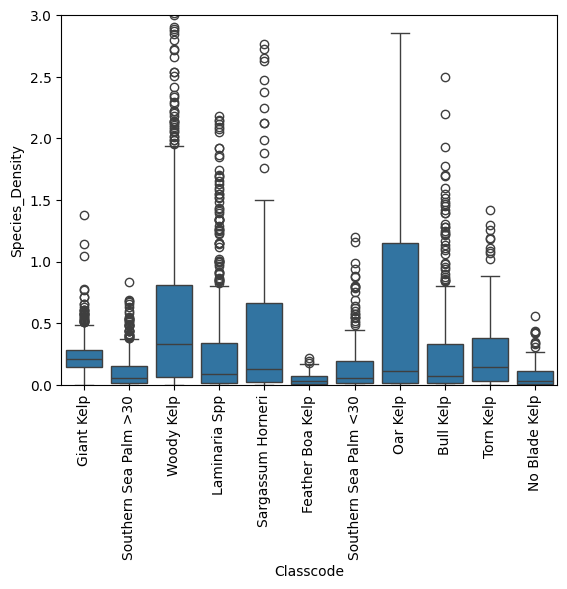

In [25]:
#2a
sns.boxplot(kelp_rcca_nonzero_df, x='Classcode',y='Species_Density')
plt.xticks(rotation=90)
plt.ylim(0,3)
plt.show()

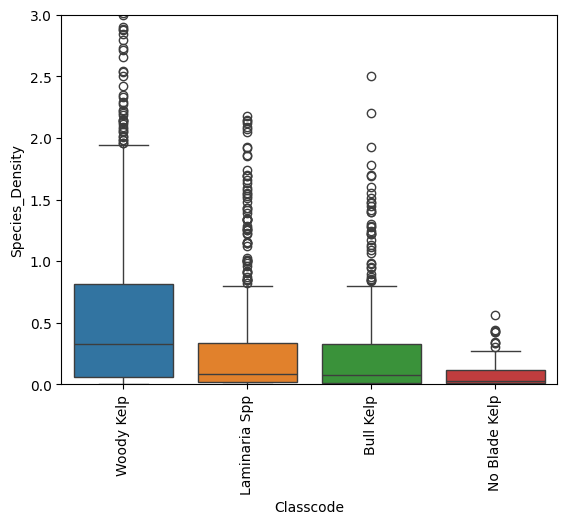

In [26]:
#2b
sns.boxplot(kelp_rcca_nonzero_df[kelp_rcca_nonzero_df.Classcode.str.contains(r'Bull|Laminaria|Woody|No Blade Kelp',regex=True)], x='Classcode',y='Species_Density', hue='Classcode')
plt.xticks(rotation=90)
plt.ylim(0,3)
plt.show()

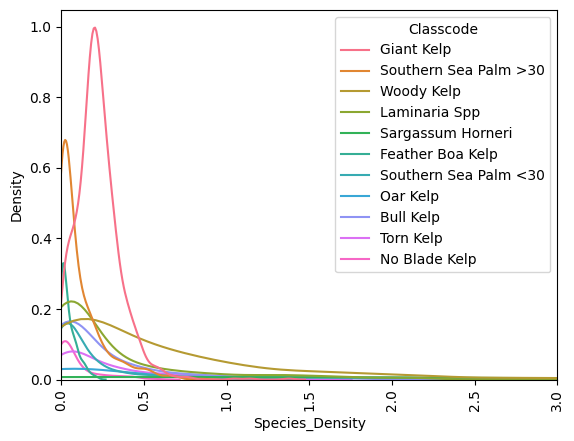

In [27]:
#3a - messy
sns.kdeplot(kelp_rcca_nonzero_df, hue='Classcode',x='Species_Density', fill=False)
plt.xticks(rotation=90)
plt.xlim(0,3)
plt.show()

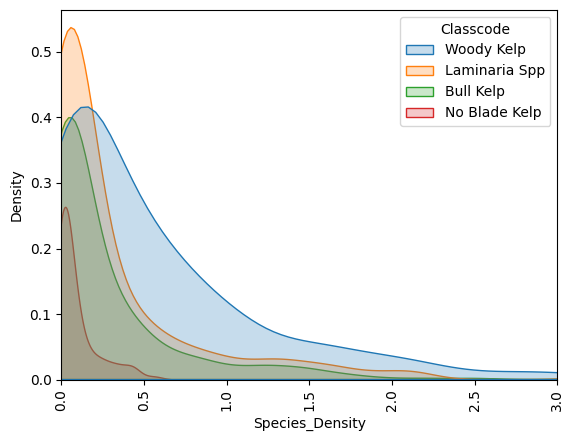

In [28]:
#3b
sns.kdeplot(kelp_rcca_nonzero_df[kelp_rcca_nonzero_df.Classcode.str.contains(r'Bull|Laminaria|Woody|No Blade Kelp',regex=True)], hue='Classcode',x='Species_Density', fill=True)
plt.xticks(rotation=90)
plt.xlim(0,3)
plt.show()

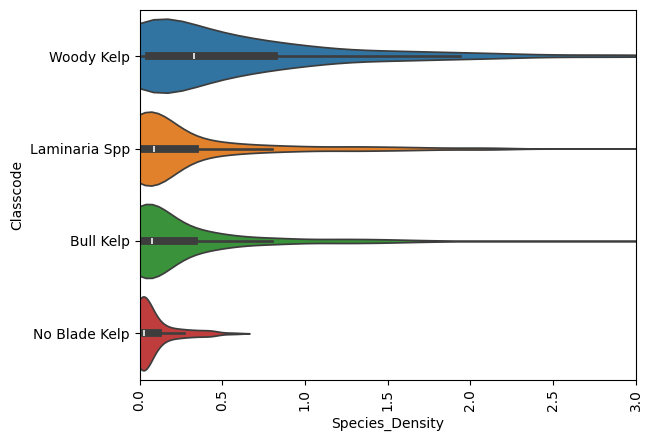

In [29]:
#3c
sns.violinplot(kelp_rcca_nonzero_df[kelp_rcca_nonzero_df.Classcode.str.contains(r'Bull|Laminaria|Woody|No Blade Kelp',regex=True)], hue='Classcode',x='Species_Density', y = 'Classcode', fill=True)
plt.xticks(rotation=90)
plt.xlim(0,3)
plt.show()

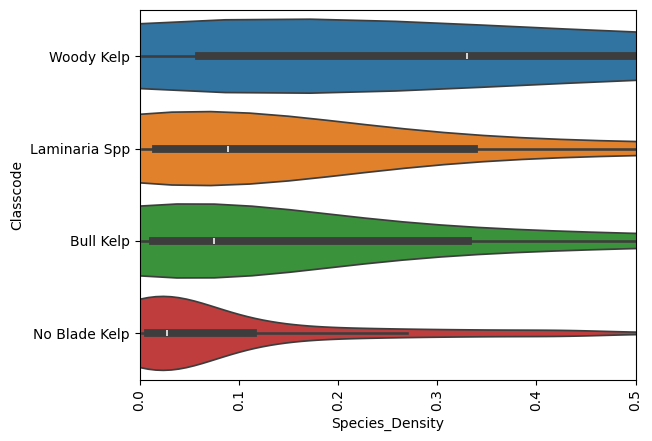

In [30]:
#3d
sns.violinplot(kelp_rcca_nonzero_df[kelp_rcca_nonzero_df.Classcode.str.contains(r'Bull|Laminaria|Woody|No Blade Kelp',regex=True)], hue='Classcode',x='Species_Density', y = 'Classcode', fill=True)
plt.xticks(rotation=90)
plt.xlim(0,0.5)
plt.show()

got the below idea for code from this source: https://github.com/mwaskom/seaborn/issues/2401#issuecomment-751357636

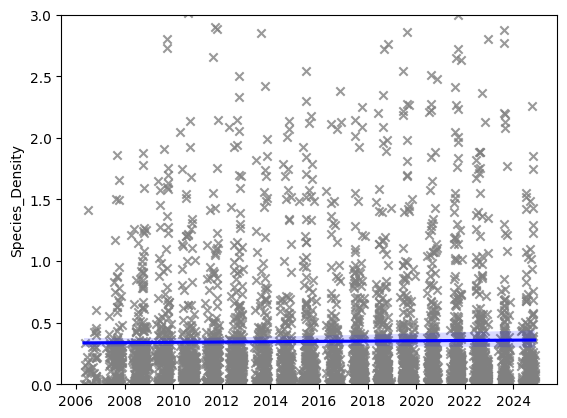

In [31]:

f, ax = plt.subplots()
ax.xaxis.update_units(kelp_rcca_nonzero_df.Date)
sns.regplot(kelp_rcca_nonzero_df,x=ax.xaxis.convert_units(kelp_rcca_nonzero_df.Date), y='Species_Density', color='0.5', marker='x',line_kws=dict(color="b"))
ax.set_ylim([0,3])


plt.show()

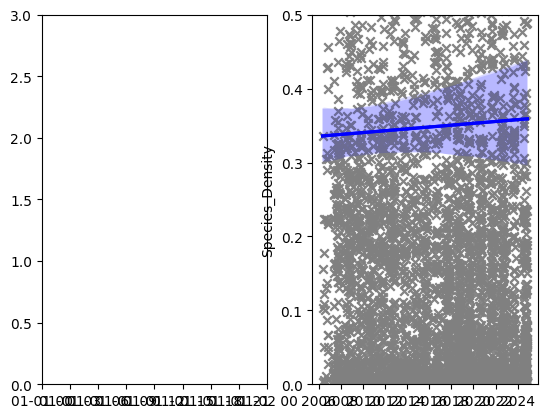

In [32]:
## did not work
f2, ax2 = plt.subplots(1,2)
ax2[0].xaxis.update_units(kelp_rcca_nonzero_df.Date)
sns.regplot(kelp_rcca_nonzero_df,x=ax2[0].xaxis.convert_units(kelp_rcca_nonzero_df.Date), y='Species_Density', color='0.5', marker='x',line_kws=dict(color="b"))
ax2[0].set_ylim([0,3])


ax2[1].xaxis.update_units(kelp_rcca_nonzero_df.Date)
sns.regplot(kelp_rcca_nonzero_df,x=ax2[1].xaxis.convert_units(kelp_rcca_nonzero_df.Date), y='Species_Density', color='0.5', marker='x',line_kws=dict(color="b"))
ax2[1].set_ylim([0,0.5])
plt.show()

plt.show()

Maybe problem with conversion of dates: 
other options:
- pd.Timestamp.toordinal()
    - converts it proleptic Gregorian ordinal: Jan 1 of Year 1 is Day 1
    - 
    
out of options

In [33]:
[i.toordinal() for i in kelp_rcca_nonzero_df.Date]

[732585,
 732907,
 732907,
 732907,
 733277,
 733565,
 733565,
 733565,
 733985,
 733985,
 733985,
 733985,
 734397,
 734397,
 734397,
 734397,
 734663,
 734663,
 734663,
 735034,
 735034,
 735034,
 735398,
 735398,
 735398,
 735831,
 735831,
 735831,
 736196,
 736196,
 736528,
 736528,
 736528,
 736885,
 737223,
 737223,
 737688,
 737688,
 737688,
 738094,
 738094,
 738094,
 738094,
 738364,
 739086,
 739086,
 739086,
 732948,
 733263,
 733263,
 733565,
 733565,
 733565,
 733963,
 733963,
 733963,
 734663,
 734663,
 734663,
 734663,
 735034,
 735034,
 735398,
 735398,
 735398,
 735398,
 735831,
 736249,
 736249,
 736528,
 736528,
 736528,
 737000,
 737000,
 737000,
 737000,
 737000,
 737688,
 737688,
 737688,
 736822,
 736822,
 737183,
 737183,
 737722,
 737722,
 735772,
 735772,
 735772,
 735772,
 736507,
 736507,
 736507,
 736864,
 736864,
 736864,
 736864,
 737228,
 737228,
 737228,
 737228,
 738026,
 738026,
 738026,
 738026,
 738328,
 738328,
 738328,
 738328,
 738328,
 738702,
 

In [34]:
kelp_rcca_nonzero_df['Dateordinal'] = [i.toordinal() for i in kelp_rcca_nonzero_df.Date]
kelp_rcca_nonzero_df.head(5)

,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2,Species_Density,Dateordinal
1,120 Reef,33.737919,2006-10-01,2006,Giant Kelp,9,63.0,63.0,360.0,720.0,0.087500,732585
6,120 Reef,33.737919,2007-08-19,2007,Giant Kelp,34,256.0,256.0,690.0,1380.0,0.185507,732907
8,120 Reef,33.737919,2007-08-19,2007,Southern Sea Palm >30,1,0.0,1.0,180.0,360.0,0.002778,732907
9,120 Reef,33.737919,2007-08-19,2007,Woody Kelp,3,0.0,3.0,180.0,360.0,0.008333,732907
11,120 Reef,33.737919,2008-08-23,2008,Giant Kelp,326,713.0,713.0,1094.0,2188.0,0.325868,733277


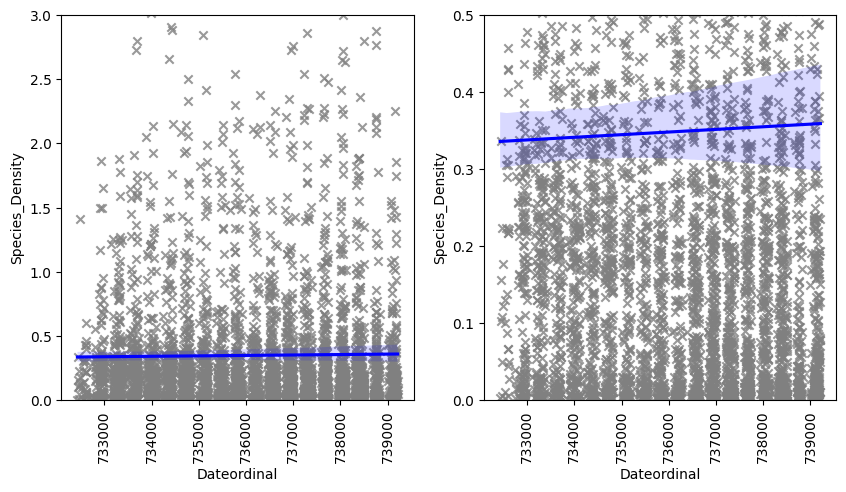

In [35]:
f2, ax2 = plt.subplots(1,2, figsize=(10,5))

sns.regplot(kelp_rcca_nonzero_df,x="Dateordinal", y='Species_Density', ax=ax2[0], color='0.5', marker='x',line_kws=dict(color="b"))
ax2[0].set_ylim([0,3])
ax2[0].tick_params(axis='x',labelrotation=90)

sns.regplot(kelp_rcca_nonzero_df,x='Dateordinal', y='Species_Density', ax=ax2[1], color='0.5', marker='x',line_kws=dict(color="b"))
ax2[1].set_ylim([0,0.5])
ax2[1].tick_params(axis='x',labelrotation=90)


plt.show()



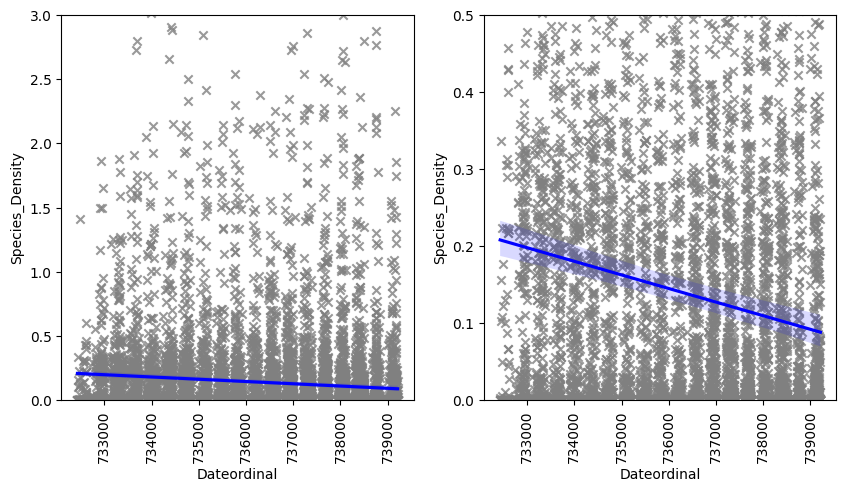

In [36]:
kelp_rcca_group['Dateordinal'] = [i.toordinal() for i in kelp_rcca_group.Date]

f1, ax1 = plt.subplots(1,2, figsize=(10,5))

sns.regplot(kelp_rcca_group,x="Dateordinal", y='Species_Density', ax=ax1[0], color='0.5', marker='x',line_kws=dict(color="b"))
ax1[0].set_ylim([0,3])
ax1[0].tick_params(axis='x',labelrotation=90)

sns.regplot(kelp_rcca_group,x='Dateordinal', y='Species_Density', ax=ax1[1], color='0.5', marker='x',line_kws=dict(color="b"))
ax1[1].set_ylim([0,0.5])
ax1[1].tick_params(axis='x',labelrotation=90)


plt.show()


## Great! We learned that dropped all zeros skews the data wayyy to much, and that overall, including all the zeros (including zeros at sites were the kelp was never present) across all of California for all kelp species, there is a negative trend



## The Plots from Here until I say stop are kind of useless (except in structure)
**What about just our species of realllll interest, bull kelp? No limit on the first y axis this time**

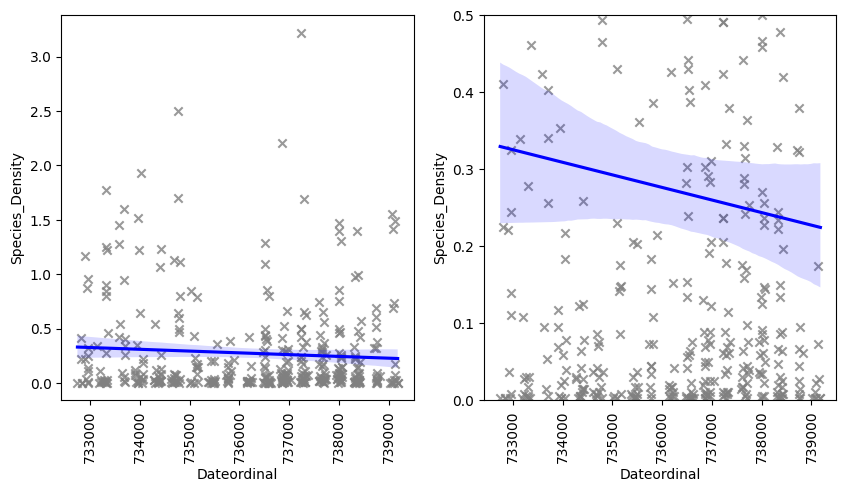

In [37]:
f3, ax3 = plt.subplots(1,2, figsize=(10,5))

sns.regplot(kelp_rcca_nonzero_df[kelp_rcca_nonzero_df.Classcode.str.contains('Bull')],x="Dateordinal", y='Species_Density', ax=ax3[0], color='0.5', marker='x',line_kws=dict(color="b"))

ax3[0].tick_params(axis='x',labelrotation=90)

sns.regplot(kelp_rcca_nonzero_df[kelp_rcca_nonzero_df.Classcode.str.contains('Bull')],x='Dateordinal', y='Species_Density', ax=ax3[1], color='0.5', marker='x',line_kws=dict(color="b"))
ax3[1].set_ylim([0,0.5])
ax3[1].tick_params(axis='x',labelrotation=90)


plt.show()


In [38]:
kelp_rcca_nonzero_df[(kelp_rcca_nonzero_df.Dateordinal>736400)&(kelp_rcca_nonzero_df.Dateordinal<737000)]

,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2,Species_Density,Dateordinal
58,120 Reef,33.737919,2017-07-18,2017,Giant Kelp,300,426.0,426.0,1008.2,2016.4,0.211268,736528
60,120 Reef,33.737919,2017-07-18,2017,Sargassum Horneri,23,0.0,23.0,180.0,360.0,0.063889,736528
62,120 Reef,33.737919,2017-07-18,2017,Woody Kelp,1,0.0,1.0,180.0,360.0,0.002778,736528
65,120 Reef,33.737919,2018-07-10,2018,Giant Kelp,263,876.0,876.0,2540.0,5080.0,0.172441,736885
167,Abalone Cove,33.736149,2017-07-18,2017,Giant Kelp,210,476.0,476.0,1254.0,2508.0,0.189793,736528
...,...,...,...,...,...,...,...,...,...,...,...,...
11258,Wipeout,32.821100,2018-09-29,2018,Giant Kelp,74,1316.0,1316.0,1830.0,3660.0,0.359563,736966
11259,Wipeout,32.821100,2018-09-29,2018,Oar Kelp,256,0.0,256.0,153.1,306.2,0.836055,736966
11261,Wipeout,32.821100,2018-09-29,2018,Southern Sea Palm <30,117,0.0,117.0,158.4,316.8,0.369318,736966
11262,Wipeout,32.821100,2018-09-29,2018,Southern Sea Palm >30,25,0.0,25.0,180.0,360.0,0.069444,736966


## STOP!

## Problem! We don't want to remove sites where there used to be kelp and then it dissapeared. Those are important zeros to include

### Need to filter out only rows of 0s where there are only rows of zero for that species at that site (no historical presence)

In [39]:
kelp_dict = kelp_rcca_group.groupby('Site')['Classcode'].unique().to_dict()

In [40]:
kelp_rcca_group['Classcode'].unique()

array(['Bull Kelp', 'Giant Kelp', 'Laminaria Spp',
       'Southern Sea Palm >30', 'Woody Kelp', 'Sargassum Horneri',
       'Feather Boa Kelp', 'Oar Kelp', 'Southern Sea Palm <30',
       'Torn Kelp', 'No Blade Kelp'], dtype=object)

In [41]:
kelp_rcca_group[kelp_rcca_group.Classcode.str.contains('Bull Kelp')]

,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2,Species_Density,Dateordinal
0,120 Reef,33.737919,2006-10-01,2006,Bull Kelp,0,0.0,0.0,180.0,360.0,0.0,732585
5,120 Reef,33.737919,2007-08-19,2007,Bull Kelp,0,0.0,0.0,180.0,360.0,0.0,732907
10,120 Reef,33.737919,2008-08-23,2008,Bull Kelp,0,0.0,0.0,180.0,360.0,0.0,733277
15,120 Reef,33.737919,2009-06-07,2009,Bull Kelp,0,0.0,0.0,180.0,360.0,0.0,733565
20,120 Reef,33.737919,2010-08-01,2010,Bull Kelp,0,0.0,0.0,180.0,360.0,0.0,733985
...,...,...,...,...,...,...,...,...,...,...,...,...
11322,Yellowbanks,33.998798,2009-10-29,2009,Bull Kelp,0,0.0,0.0,180.0,360.0,0.0,733709
11327,Yellowbanks,33.998798,2010-11-17,2010,Bull Kelp,0,0.0,0.0,180.0,360.0,0.0,734093
11332,Yellowbanks,33.998798,2011-08-19,2011,Bull Kelp,0,0.0,0.0,180.0,360.0,0.0,734368
11337,Yellowbanks,33.998798,2012-07-24,2012,Bull Kelp,0,0.0,0.0,180.0,360.0,0.0,734708


In [42]:
kelp_rcca_group.iloc[0,:]['Total']

0.0

In [43]:
kelp_rcca_group.Classcode.unique()

array(['Bull Kelp', 'Giant Kelp', 'Laminaria Spp',
       'Southern Sea Palm >30', 'Woody Kelp', 'Sargassum Horneri',
       'Feather Boa Kelp', 'Oar Kelp', 'Southern Sea Palm <30',
       'Torn Kelp', 'No Blade Kelp'], dtype=object)

In [44]:
kelp_rcca_group

def drophistoricalnull(dataframe, column_category_1, column_category_2, column_zeros):
    
    cat_dict = dataframe.groupby(column_category_1)[column_category_2].unique().to_dict()
    
    for cat1,classcodes in cat_dict.items():
        for cat2 in classcodes:
            cat_df = dataframe[(dataframe[column_category_1].str.contains(cat1))&(dataframe[column_category_2].str.contains(cat2))]
            if cat_df[column_zeros].sum() == 0.0:
                dataframe = dataframe.drop(cat_df.index, axis=0)
    return dataframe
    
kelp_rcca_nohistzero_df = drophistoricalnull(kelp_rcca_group, 'Site', 'Classcode','Total')             

In [45]:
print(kelp_rcca_nohistzero_df.shape)
kelp_rcca_nohistzero_df.head(3)

(6871, 12)


,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2,Species_Density,Dateordinal
1,120 Reef,33.737919,2006-10-01,2006,Giant Kelp,9,63.0,63.0,360.0,720.0,0.0875,732585
2,120 Reef,33.737919,2006-10-01,2006,Laminaria Spp,0,0.0,0.0,180.0,360.0,0.0000,732585
3,120 Reef,33.737919,2006-10-01,2006,Southern Sea Palm >30,0,0.0,0.0,180.0,360.0,0.0000,732585


In [46]:
print(kelp_rcca_group.shape)
kelp_rcca_group.head(3)

(11347, 12)


,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2,Species_Density,Dateordinal
0,120 Reef,33.737919,2006-10-01,2006,Bull Kelp,0,0.0,0.0,180.0,360.0,0.0000,732585
1,120 Reef,33.737919,2006-10-01,2006,Giant Kelp,9,63.0,63.0,360.0,720.0,0.0875,732585
2,120 Reef,33.737919,2006-10-01,2006,Laminaria Spp,0,0.0,0.0,180.0,360.0,0.0000,732585


## Great! We kept at the zeros were at some point in time the species was present for each species for each site.

## This reduced the dataframe into about 4,500 less rows! Should change up the data quite a bit

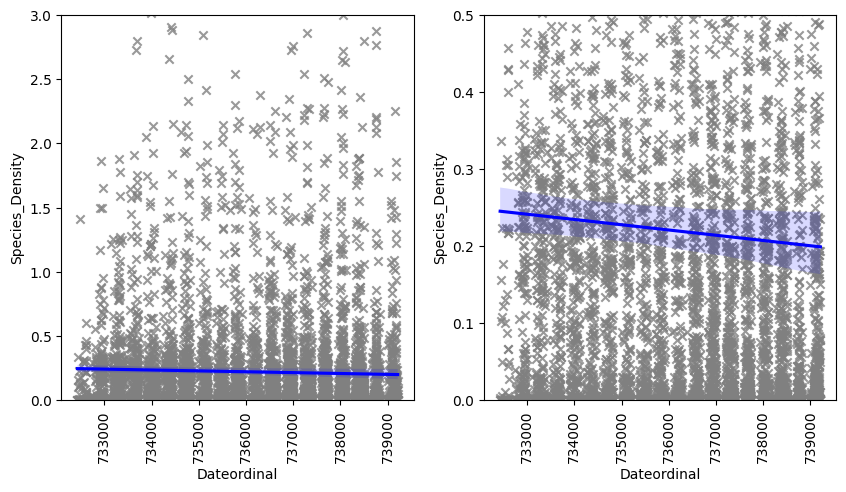

In [47]:
kelp_rcca_nohistzero_df['Dateordinal'] = [i.toordinal() for i in kelp_rcca_nohistzero_df.Date]

f4, ax4 = plt.subplots(1,2, figsize=(10,5))

sns.regplot(kelp_rcca_nohistzero_df,x="Dateordinal", y='Species_Density', ax=ax4[0], color='0.5', marker='x',line_kws=dict(color="b"))
ax4[0].set_ylim([0,3])
ax4[0].tick_params(axis='x',labelrotation=90)

sns.regplot(kelp_rcca_nohistzero_df,x='Dateordinal', y='Species_Density', ax=ax4[1], color='0.5', marker='x',line_kws=dict(color="b"))
ax4[1].set_ylim([0,0.5])
ax4[1].tick_params(axis='x',labelrotation=90)


plt.show()


**That made quite a difference!**

This change was made somewhat late in the game. So! We are going to reassign kelp_rcca_nohistzero_df to kelp_rcca_group so we can just plug and chug.

In [48]:
kelp_rcca_group = kelp_rcca_nohistzero_df

In [49]:
kelp_rcca_group

,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2,Species_Density,Dateordinal
1,120 Reef,33.737919,2006-10-01,2006,Giant Kelp,9,63.0,63.0,360.0,720.0,0.087500,732585
2,120 Reef,33.737919,2006-10-01,2006,Laminaria Spp,0,0.0,0.0,180.0,360.0,0.000000,732585
3,120 Reef,33.737919,2006-10-01,2006,Southern Sea Palm >30,0,0.0,0.0,180.0,360.0,0.000000,732585
4,120 Reef,33.737919,2006-10-01,2006,Woody Kelp,0,0.0,0.0,180.0,360.0,0.000000,732585
6,120 Reef,33.737919,2007-08-19,2007,Giant Kelp,34,256.0,256.0,690.0,1380.0,0.185507,732907
...,...,...,...,...,...,...,...,...,...,...,...,...
11341,Yellowbanks,33.998798,2012-07-24,2012,Woody Kelp,195,0.0,195.0,178.0,356.0,0.547753,734708
11343,Yellowbanks,33.998798,2013-11-07,2013,Giant Kelp,96,574.0,574.0,1620.0,3240.0,0.177160,735179
11344,Yellowbanks,33.998798,2013-11-07,2013,Laminaria Spp,183,0.0,183.0,180.0,360.0,0.508333,735179
11345,Yellowbanks,33.998798,2013-11-07,2013,Southern Sea Palm >30,17,0.0,17.0,180.0,360.0,0.047222,735179


**Lets just focus on the sites we care about. Filter by latitude again**

In [50]:
ftbrgg_kelpdensity = kelp_rcca_group[(kelp_rcca_group.Latitude>=39)&(kelp_rcca_group.Latitude<=40)]
ftbrgg_kelpdensity.head()

,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2,Species_Density,Dateordinal
190,Albion Cove,39.22778,2018-05-08,2018,Bull Kelp,47,0.0,47.0,180.0,360.0,0.130556,736822
197,Albion Cove,39.22778,2018-05-08,2018,Torn Kelp,0,0.0,0.0,180.0,360.0,0.000000,736822
198,Albion Cove,39.22778,2018-05-08,2018,Woody Kelp,253,0.0,253.0,156.1,312.2,0.810378,736822
199,Albion Cove,39.22778,2019-05-04,2019,Bull Kelp,0,0.0,0.0,180.0,360.0,0.000000,737183
206,Albion Cove,39.22778,2019-05-04,2019,Torn Kelp,94,0.0,94.0,168.0,336.0,0.279762,737183


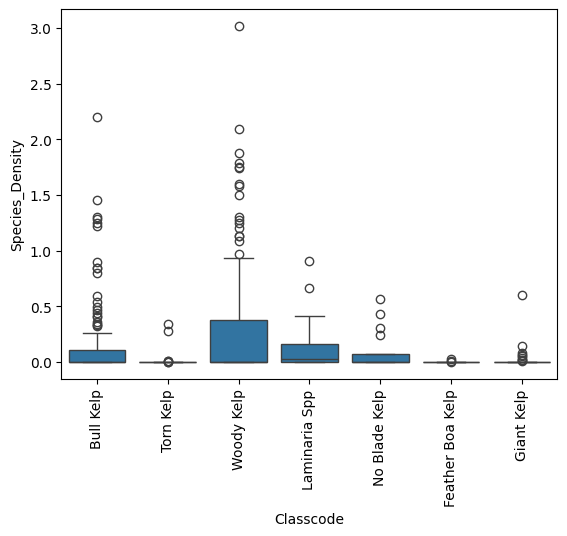

In [51]:
sns.boxplot(ftbrgg_kelpdensity, x='Classcode',y='Species_Density')
plt.xticks(rotation=90)
plt.show()

**facet by site**

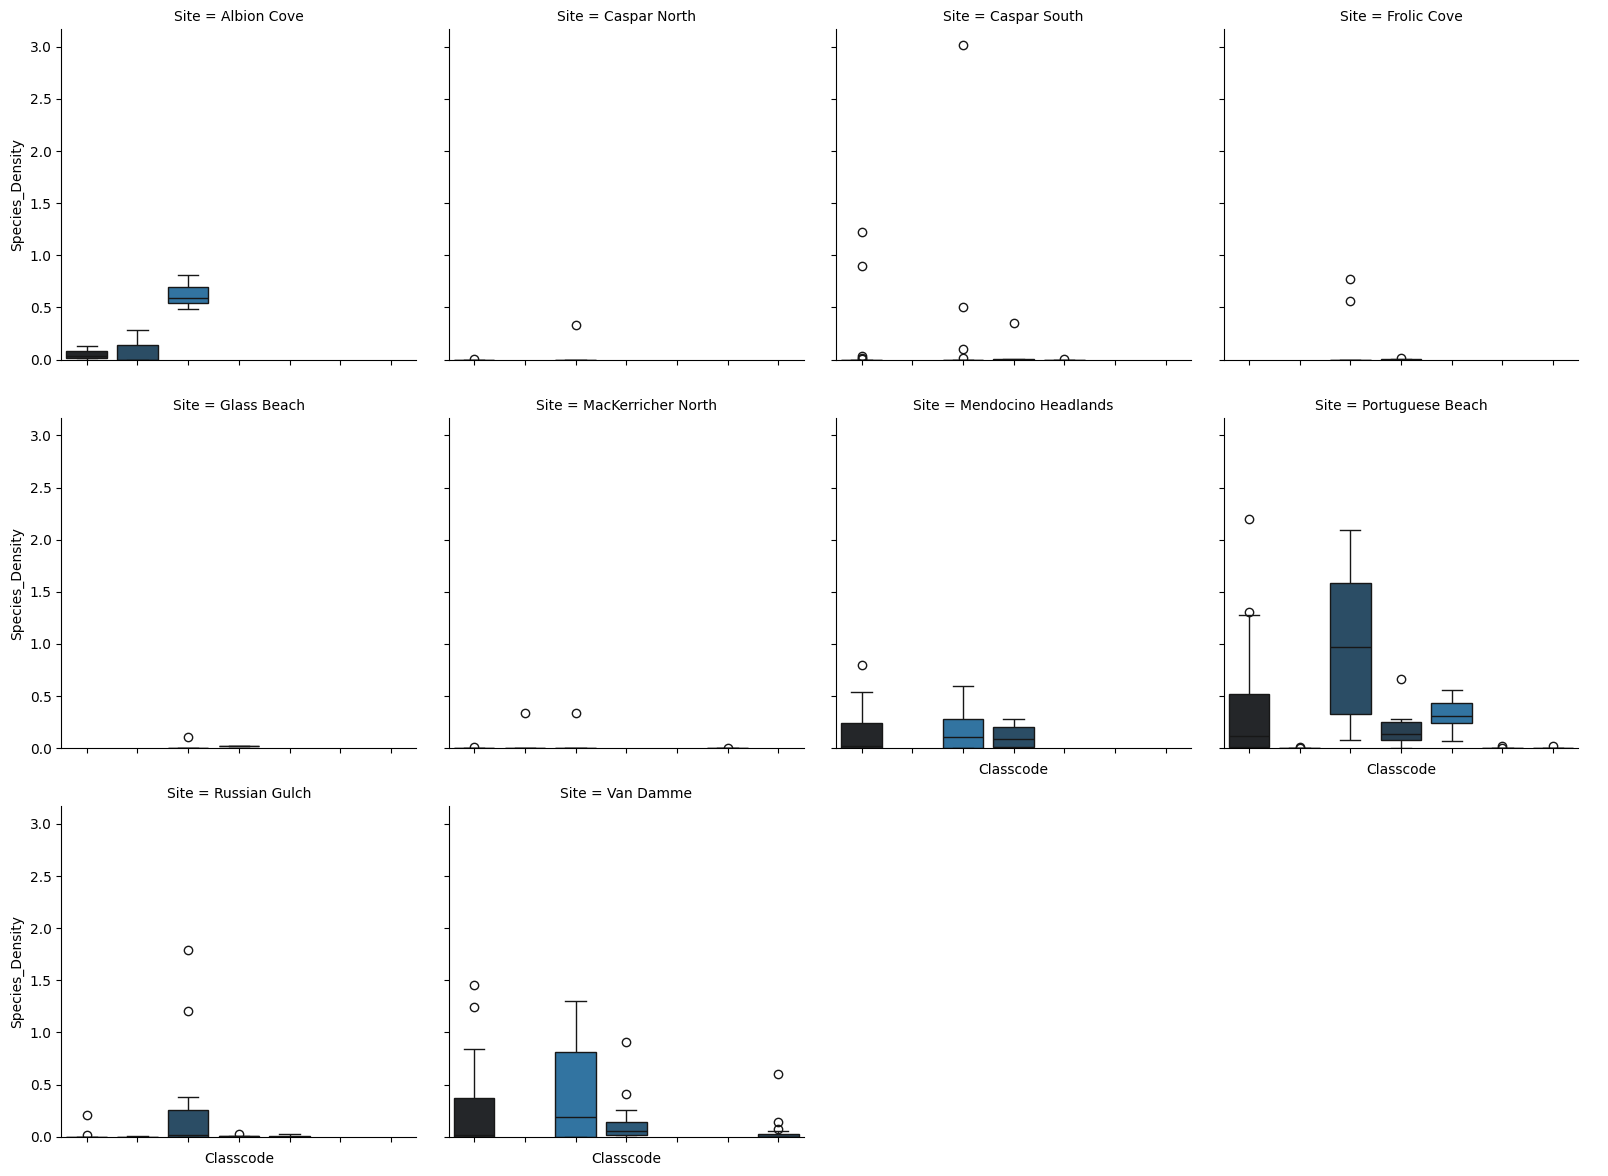

In [52]:
facet = sns.FacetGrid(ftbrgg_kelpdensity, col = 'Site', col_wrap=4, height=4)
facet.map_dataframe(sns.boxplot, x = 'Classcode', y='Species_Density', hue='Classcode')
facet.set_xticklabels(rotation=90)
facet.add_legend()
facet.set(ylim=(0,None))
plt.show()

**Scatter plot**

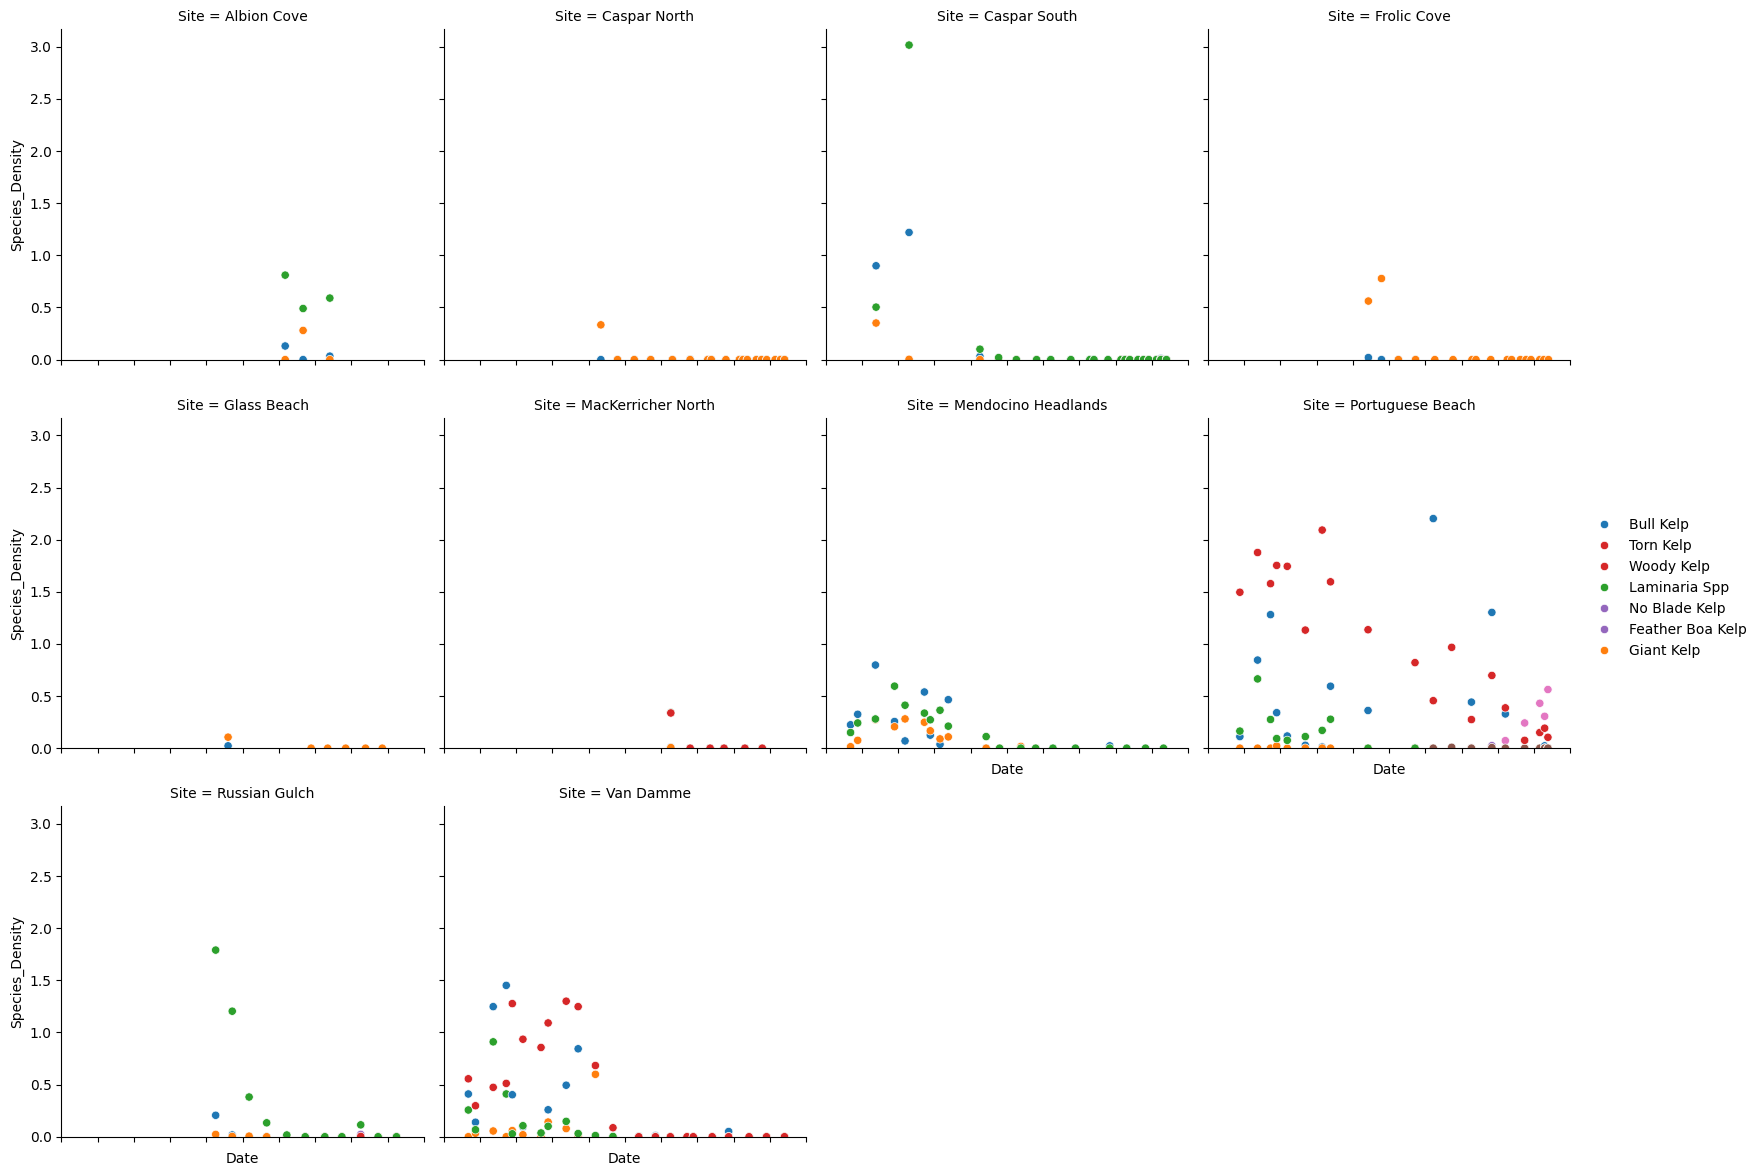

In [53]:
facet = sns.FacetGrid(ftbrgg_kelpdensity, col = 'Site', col_wrap=4, height=4)
facet.map_dataframe(sns.scatterplot, x = 'Date', y='Species_Density', hue='Classcode')
facet.set_xticklabels(rotation=90)
facet.add_legend()
facet.set(ylim=(0,None))
plt.show()

**Upon visual inspection, it looks like Caspar Beaches have the most in common with Frolic Cove (shares similar species and range of density), followed by Mendocino Headlands, and then Van Damme.**



## Checkpoint : Diversity

**Similar to invert data in Analysis 1:

## Gini-Simpson's Biodiversity Index
D = 1 - (sum(n(n-1)) / (N(n-1)))


where n = number of individuals of a specific species and N represents the total number of species in the sample. 
 
1. For each Site and Date, need to get a total number of individuals at the site per day. Assign this to "N_site"
2. Calculate the "(sum(n(n-1)) / (N(n-1)))" portion for each species and assign it to "kelp_n_N". Append this as a new column of the same name to theseries_df
3. Group by Site, Date, Year, and Latitude, while Summing n_n1_N_N1. Subtract this from one. Reset the index and assing this to a new dataframe "simpsons_biodiv". Rename the columns to reflect the new values. This is the Simpson Biodiversity Index of that site at that moment in time
4. Plot!

In [54]:
N_site = kelp_rcca_group.groupby(['Site','Date'])['Total'].sum().reset_index()
N_site.rename(columns={'Total':'Total_Count_Site'}, inplace=True)
N_site



,Site,Date,Total_Count_Site
0,120 Reef,2006-10-01,63.0
1,120 Reef,2007-08-19,260.0
2,120 Reef,2008-08-23,713.0
3,120 Reef,2009-06-07,1070.0
4,120 Reef,2010-08-01,651.0
...,...,...,...
1582,Yellowbanks,2009-10-29,614.0
1583,Yellowbanks,2010-11-17,1150.0
1584,Yellowbanks,2011-08-19,908.0
1585,Yellowbanks,2012-07-24,1263.0


**Want to append these values onto the kelp_rcca_group dataframe**

In [55]:
kelp_rcca_group = pd.merge(kelp_rcca_group, N_site[['Site','Date','Total_Count_Site']], on=['Site','Date'], how ='left')
kelp_rcca_group.isna().sum()

Site                0
Latitude            0
Date                0
Year                0
Classcode           0
Amount              0
Stipes              0
Total               0
Distance            0
Area_m2             0
Species_Density     0
Dateordinal         0
Total_Count_Site    0
dtype: int64

In [56]:
kelp_n_N = (kelp_rcca_group.Total*(kelp_rcca_group.Total -1))/(kelp_rcca_group.Total_Count_Site * (kelp_rcca_group.Total_Count_Site -1))
kelp_rcca_group['n_N'] = kelp_n_N
kelp_rcca_group['n_N'] = kelp_rcca_group['n_N'].fillna(0)

kelp_rcca_group.shape

(6871, 14)

In [57]:
## Simpsons Biodiversity index is D, where 1 indicates no diversity
kelp_rcca_biodiv = (kelp_rcca_group.groupby(['Site','Latitude','Date','Year'])['n_N'].sum()).reset_index()
kelp_rcca_biodiv= kelp_rcca_biodiv.rename(columns={'n_N':'D'})

## want to remove the 0's for D as this would mean infinite diversity, but it is actually a DNE answer (cant divide 0 by 0)
kelp_rcca_biodiv = kelp_rcca_biodiv[kelp_rcca_biodiv.D!=0.0]
kelp_rcca_biodiv.head()

,Site,Latitude,Date,Year,D
0,120 Reef,33.737919,2006-10-01,2006,1.000000
1,120 Reef,33.737919,2007-08-19,2007,0.969498
2,120 Reef,33.737919,2008-08-23,2008,1.000000
3,120 Reef,33.737919,2009-06-07,2009,0.979590
4,120 Reef,33.737919,2010-08-01,2010,0.635359


In [58]:
kelp_rcca_biodiv['Simpsons_Biodiv_Index'] = 1 - kelp_rcca_biodiv.D
kelp_rcca_biodiv.head()

,Site,Latitude,Date,Year,D,Simpsons_Biodiv_Index
0,120 Reef,33.737919,2006-10-01,2006,1.000000,0.000000
1,120 Reef,33.737919,2007-08-19,2007,0.969498,0.030502
2,120 Reef,33.737919,2008-08-23,2008,1.000000,0.000000
3,120 Reef,33.737919,2009-06-07,2009,0.979590,0.020410
4,120 Reef,33.737919,2010-08-01,2010,0.635359,0.364641


In [59]:
## used this cell to check when Simpsons came back as 0
kelp_rcca[(kelp_rcca.Site.str.contains('Van'))&(kelp_rcca.Year==(2017))];
kelp_rcca_biodiv[kelp_rcca_biodiv.Site.str.contains('Van')].head()

,Site,Latitude,Date,Year,D,Simpsons_Biodiv_Index
1488,Van Damme,39.271915,2007-05-15,2007,0.371605,0.628395
1489,Van Damme,39.271915,2007-10-06,2007,0.390652,0.609348
1490,Van Damme,39.271915,2008-09-27,2008,0.315421,0.684579
1491,Van Damme,39.271915,2009-06-17,2009,0.377066,0.622934
1492,Van Damme,39.271915,2009-10-17,2009,0.441732,0.558268


**Now we can see trends in biodiveristy of sites!**

**Should filter back down to fort bragg area**

In [60]:
ftbrgg_kelp_biodiv = kelp_rcca_biodiv[(kelp_rcca_biodiv.Latitude>=39)&(kelp_rcca_biodiv.Latitude<=40)]
ftbrgg_kelp_biodiv 

,Site,Latitude,Date,Year,D,Simpsons_Biodiv_Index
30,Albion Cove,39.227780,2018-05-08,2018,0.734872,0.265128
31,Albion Cove,39.227780,2019-05-04,2019,0.523654,0.476346
32,Albion Cove,39.227780,2020-10-24,2020,0.867287,0.132713
233,Caspar North,39.364647,2014-09-06,2014,1.000000,0.000000
251,Caspar South,39.361729,2008-10-11,2008,0.375013,0.624987
...,...,...,...,...,...,...
1498,Van Damme,39.271915,2014-05-19,2014,0.537959,0.462041
1499,Van Damme,39.271915,2015-05-08,2015,0.937500,0.062500
1500,Van Damme,39.271915,2016-10-09,2016,1.000000,0.000000
1501,Van Damme,39.271915,2017-09-10,2017,1.000000,0.000000


<Axes: xlabel='Year', ylabel='Simpsons_Biodiv_Index'>

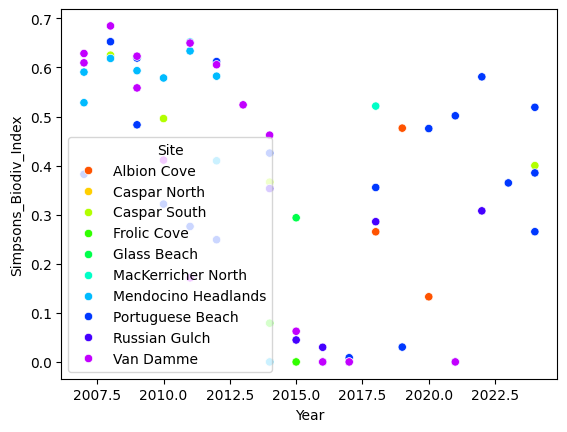

In [61]:
sns.scatterplot(ftbrgg_kelp_biodiv, x='Year', y = 'Simpsons_Biodiv_Index', hue='Site', palette='gist_rainbow')

**Shows that Caspar North has only one date with biodiversity? Need to investigate further**

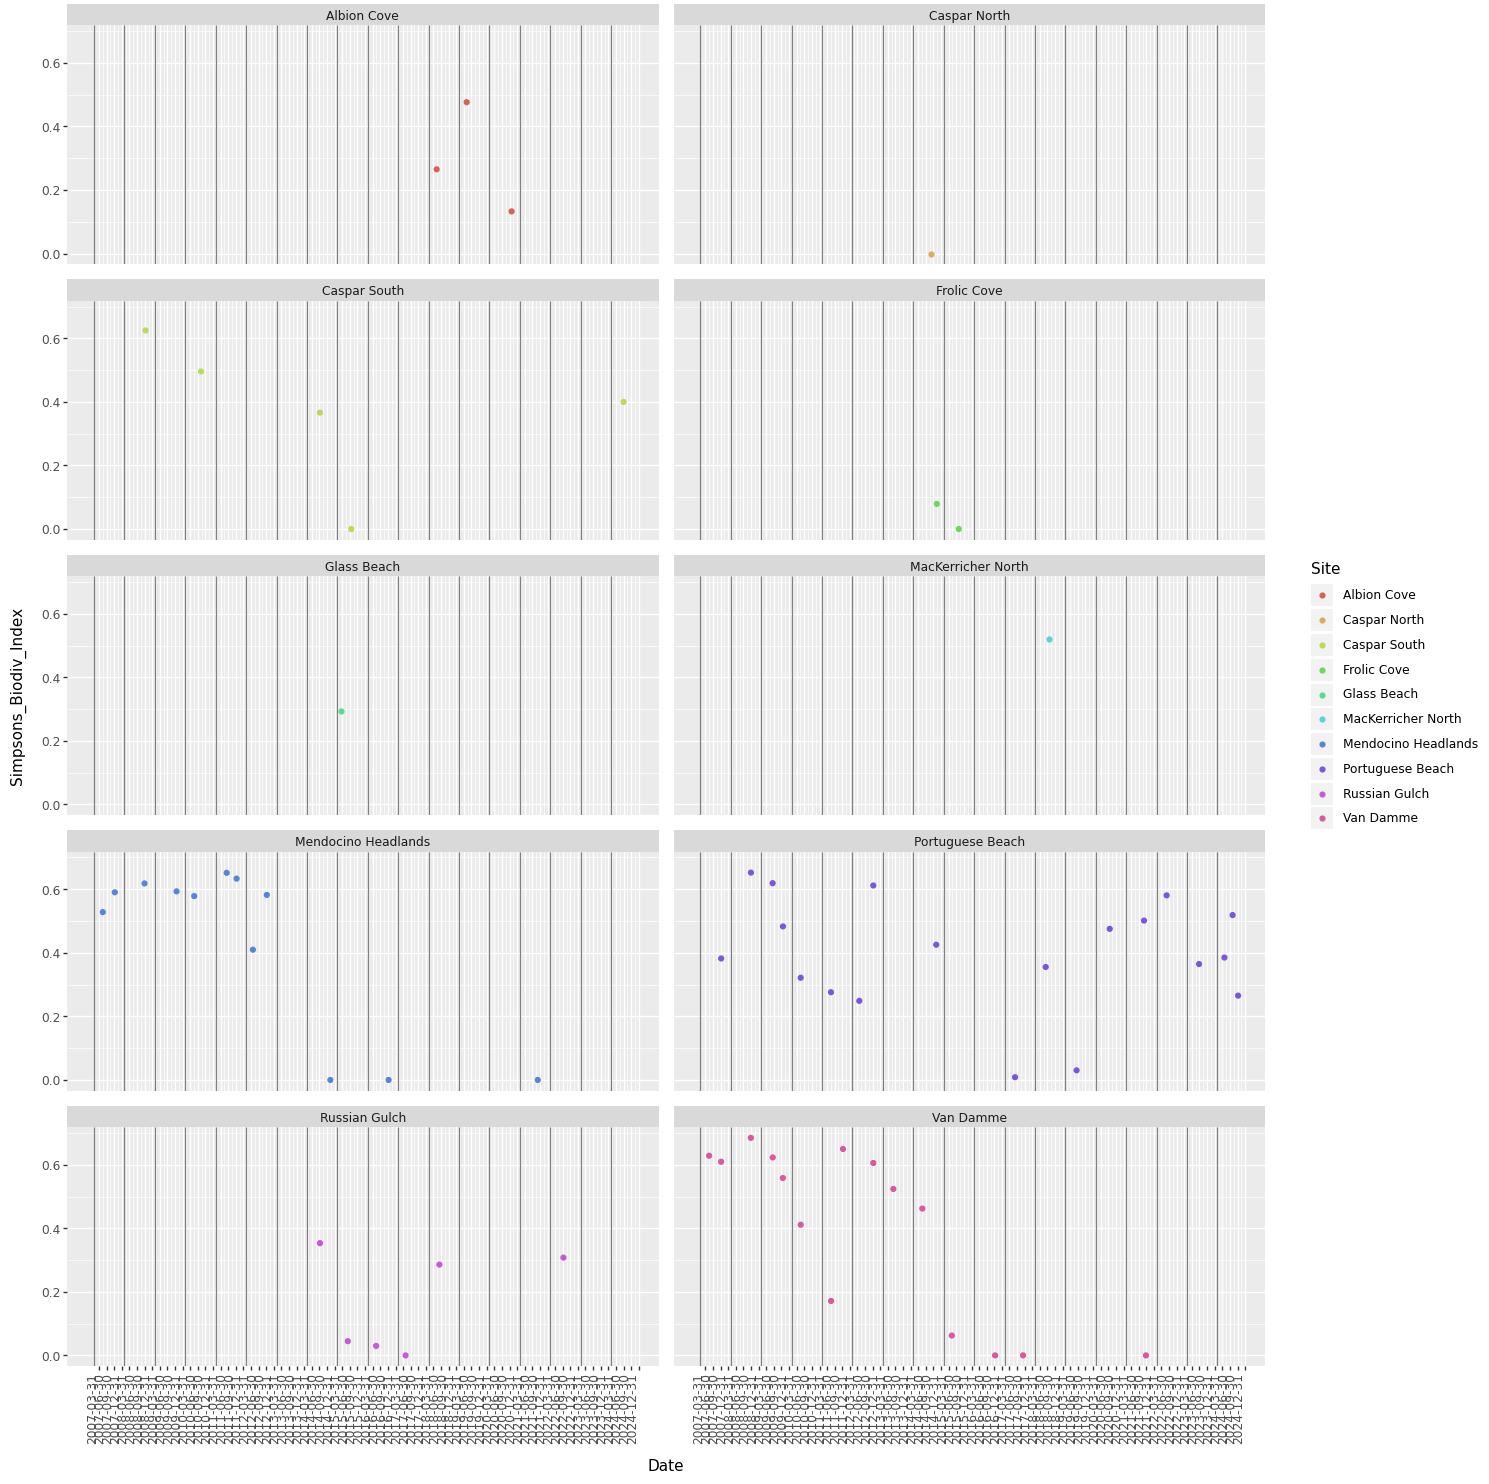

In [62]:
start_dates = pd.date_range(start='2007-01-01', end='2024-12-31', freq='A-JAN')
## the line above will allow me to add lines at the start of every year
(ggplot(ftbrgg_kelp_biodiv, aes('Date',"Simpsons_Biodiv_Index",color='Site'))
+geom_point()
+theme(axis_text_x = element_text(angle=90, hjust=1))
+facet_wrap('Site', nrow=5)
+ scale_x_date(
    breaks=pd.date_range(start='2007-01-01', end='2024-12-31', freq='Q'))
 + geom_vline(xintercept=start_dates, color='grey', linetype='solid', size=.5)
+theme(figure_size=(15,15))

).draw()


In [63]:
ftbrgg_kelp_biodiv[ftbrgg_kelp_biodiv.Site == 'Caspar North']

,Site,Latitude,Date,Year,D,Simpsons_Biodiv_Index
233,Caspar North,39.364647,2014-09-06,2014,1.0,0.0


**WOW! All other years at caspar resulted in no kelp found, and the one year they found kelp there was only 1 species**


## Pivoting! But not really. Focusing on bull kelp counts!

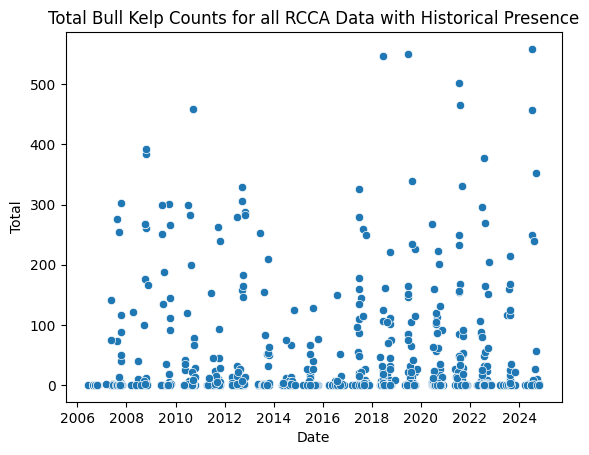

In [64]:
sns.scatterplot(kelp_rcca_group[kelp_rcca_group.Classcode=='Bull Kelp'], x='Date',y='Total')

plt.title('Total Bull Kelp Counts for all RCCA Data with Historical Presence')

plt.show()

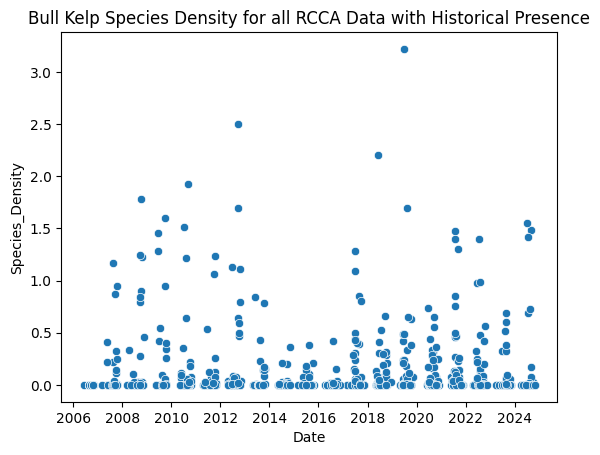

In [65]:
sns.scatterplot(kelp_rcca_group[kelp_rcca_group.Classcode=='Bull Kelp'], x='Date',y='Species_Density')

plt.title('Bull Kelp Species Density for all RCCA Data with Historical Presence')

plt.show()

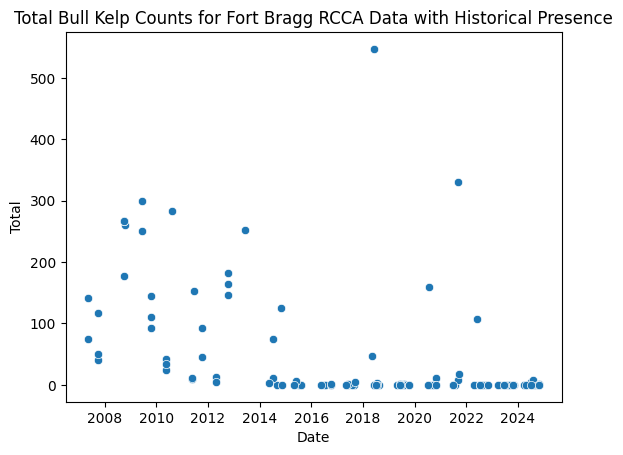

In [66]:
sns.scatterplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp'], x='Date',y='Total')

plt.title('Total Bull Kelp Counts for Fort Bragg RCCA Data with Historical Presence')

plt.show()

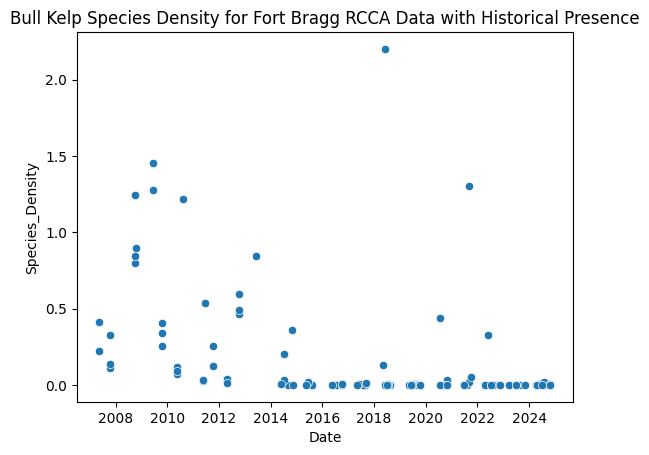

In [67]:
sns.scatterplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp'], x='Date',y='Species_Density')

plt.title('Bull Kelp Species Density for Fort Bragg RCCA Data with Historical Presence')

plt.show()

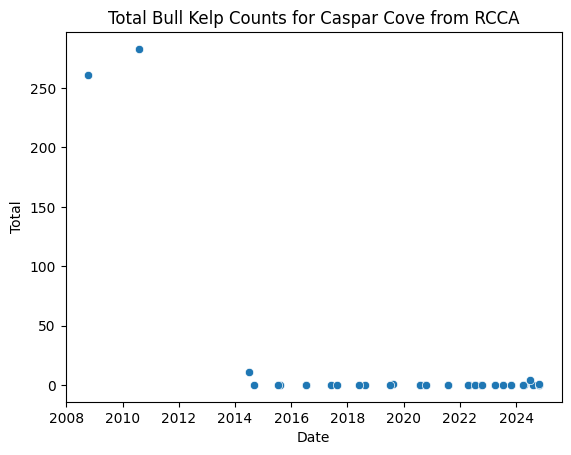

In [68]:
sns.scatterplot(ftbrgg_kelpdensity[(ftbrgg_kelpdensity.Classcode=='Bull Kelp')&(ftbrgg_kelpdensity.Site.str.contains('Caspar'))], x='Date',y='Total')

plt.title('Total Bull Kelp Counts for Caspar Cove from RCCA')

plt.show()

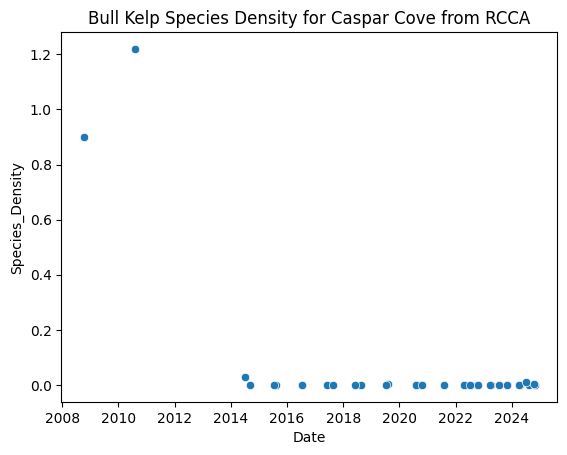

In [69]:
sns.scatterplot(ftbrgg_kelpdensity[(ftbrgg_kelpdensity.Classcode=='Bull Kelp')&(ftbrgg_kelpdensity.Site.str.contains('Caspar'))], x='Date',y='Species_Density')

plt.title('Bull Kelp Species Density for Caspar Cove from RCCA')

plt.show()

In [70]:
kelp_rcca[(kelp_rcca.Classcode=='Bull Kelp')&(kelp_rcca.Site.str.contains('Caspar'))].Date.sort_values().unique()

<DatetimeArray>
['2008-10-11 00:00:00', '2010-08-07 00:00:00', '2014-07-06 00:00:00',
 '2014-09-06 00:00:00', '2015-07-18 00:00:00', '2015-08-08 00:00:00',
 '2016-07-09 00:00:00', '2016-07-10 00:00:00', '2017-06-07 00:00:00',
 '2017-08-21 00:00:00', '2018-06-02 00:00:00', '2018-08-18 00:00:00',
 '2019-07-12 00:00:00', '2019-08-10 00:00:00', '2020-07-29 00:00:00',
 '2020-07-31 00:00:00', '2020-10-10 00:00:00', '2020-10-20 00:00:00',
 '2021-07-31 00:00:00', '2021-08-01 00:00:00', '2022-04-18 00:00:00',
 '2022-04-29 00:00:00', '2022-07-10 00:00:00', '2022-10-06 00:00:00',
 '2022-10-13 00:00:00', '2023-03-27 00:00:00', '2023-04-06 00:00:00',
 '2023-07-15 00:00:00', '2023-07-20 00:00:00', '2023-10-30 00:00:00',
 '2023-11-01 00:00:00', '2024-04-02 00:00:00', '2024-04-19 00:00:00',
 '2024-06-30 00:00:00', '2024-08-05 00:00:00', '2024-10-20 00:00:00',
 '2024-10-26 00:00:00']
Length: 37, dtype: datetime64[ns]

**Wow! Big big between 2010 and 2014 that would provide some good data. Investigate the individual sites further to get approximations of trends**

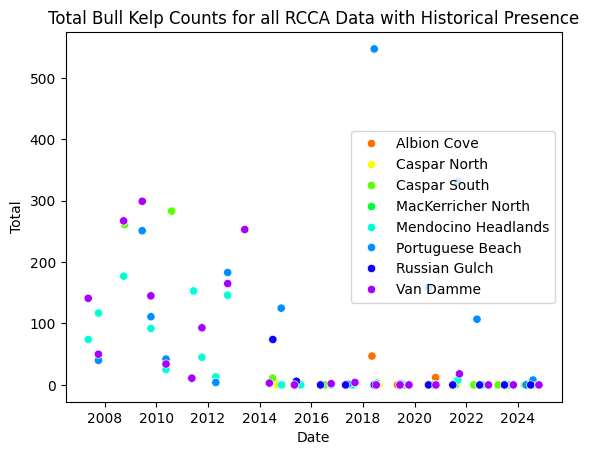

In [71]:
sns.scatterplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp'], x='Date',y='Total', hue='Site', palette='gist_rainbow')

plt.title('Total Bull Kelp Counts for all RCCA Data with Historical Presence')
plt.legend(loc='center right')

plt.show()

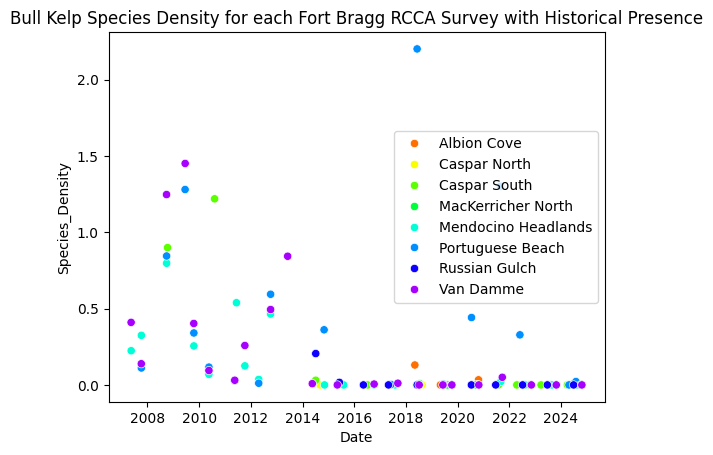

In [72]:
sns.scatterplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp'], x='Date',y='Species_Density', hue='Site', palette='gist_rainbow')

plt.title('Bull Kelp Species Density for each Fort Bragg RCCA Survey with Historical Presence')
plt.legend(loc='center right')

plt.show()

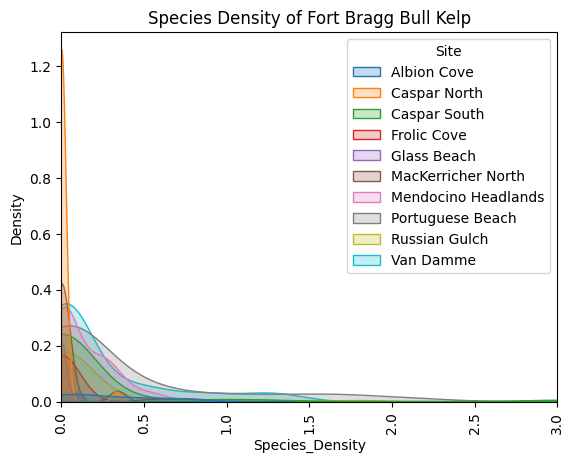

In [73]:

sns.kdeplot(ftbrgg_kelpdensity, hue='Site', x= 'Species_Density', fill=True)
plt.xticks(rotation=90)
plt.xlim((0, 3))
plt.title('Species Density of Fort Bragg Bull Kelp')
plt.show()

In [74]:
ftbrgg_kelpdensity

,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2,Species_Density,Dateordinal
190,Albion Cove,39.227780,2018-05-08,2018,Bull Kelp,47,0.0,47.0,180.0,360.0,0.130556,736822
197,Albion Cove,39.227780,2018-05-08,2018,Torn Kelp,0,0.0,0.0,180.0,360.0,0.000000,736822
198,Albion Cove,39.227780,2018-05-08,2018,Woody Kelp,253,0.0,253.0,156.1,312.2,0.810378,736822
199,Albion Cove,39.227780,2019-05-04,2019,Bull Kelp,0,0.0,0.0,180.0,360.0,0.000000,737183
206,Albion Cove,39.227780,2019-05-04,2019,Torn Kelp,94,0.0,94.0,168.0,336.0,0.279762,737183
...,...,...,...,...,...,...,...,...,...,...,...,...
10799,Van Damme,39.271915,2023-10-28,2023,Giant Kelp,0,0.0,0.0,180.0,360.0,0.000000,738821
10806,Van Damme,39.271915,2023-10-28,2023,Woody Kelp,0,0.0,0.0,180.0,360.0,0.000000,738821
10807,Van Damme,39.271915,2024-10-24,2024,Bull Kelp,0,0.0,0.0,180.0,360.0,0.000000,739183
10809,Van Damme,39.271915,2024-10-24,2024,Giant Kelp,0,0.0,0.0,180.0,360.0,0.000000,739183


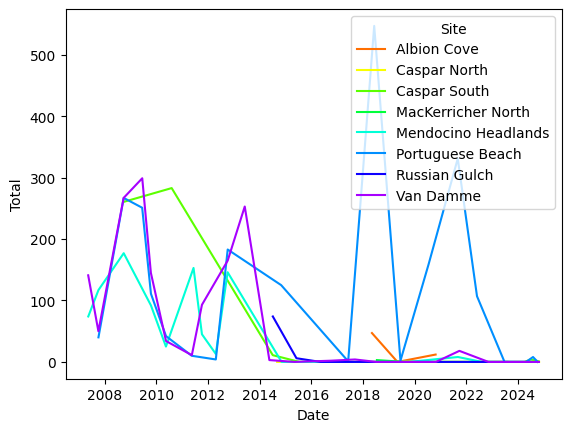

In [75]:

sns.lineplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp'], x='Date',y='Total', hue='Site', palette='gist_rainbow')
plt.show()

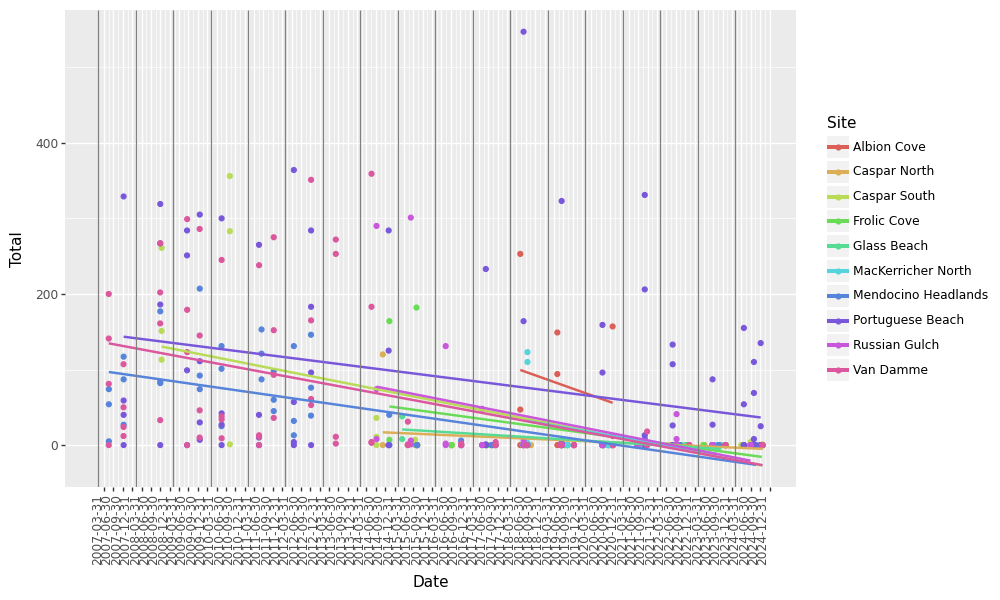

In [76]:
start_dates = pd.date_range(start='2007-01-01', end='2024-12-31', freq='A-JAN')
## the line above will allow me to add lines at the start of every year


(ggplot(ftbrgg_kelpdensity, aes('Date',"Total",color='Site'))
+geom_point()
+theme(axis_text_x = element_text(angle=90, hjust=1))
 + geom_smooth(method='lm', se=False)
+ scale_x_date(
    breaks=pd.date_range(start='2007-01-01', end='2024-12-31', freq='Q'))
 + geom_vline(xintercept=start_dates, color='grey', linetype='solid', size=.5)
+theme(figure_size=(10,6))

).draw()


## Overall! Negative trend in bullkelp

## What about the sites most similar to Caspar?

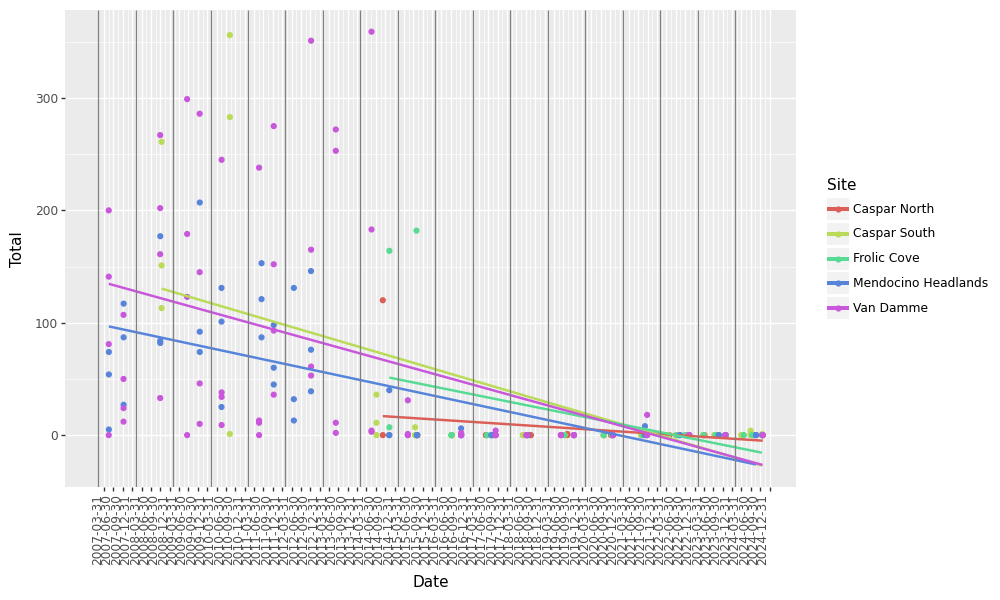

In [77]:
start_dates = pd.date_range(start='2007-01-01', end='2024-12-31', freq='A-JAN')
## the line above will allow me to add lines at the start of every year


(ggplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Site.str.contains(r'Caspar|Van|Mendocino|Frolic',regex=True)], aes('Date',"Total",color='Site'))
+geom_point()
+theme(axis_text_x = element_text(angle=90, hjust=1))
 + geom_smooth(method='lm', se=False)
+ scale_x_date(
    breaks=pd.date_range(start='2007-01-01', end='2024-12-31', freq='Q'))
 + geom_vline(xintercept=start_dates, color='grey', linetype='solid', size=.5)
+theme(figure_size=(10,6))

).draw()


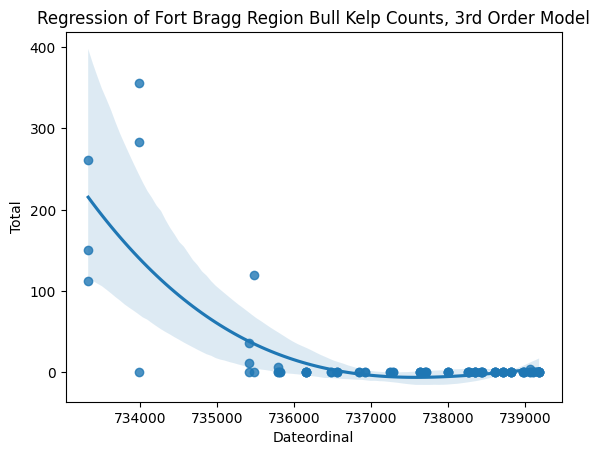

In [78]:
regplot = sns.regplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Site.str.contains('Caspar')],x='Dateordinal',y='Total', order=3)
plt.title('Regression of Fort Bragg Region Bull Kelp Counts, 3rd Order Model')

plt.show()

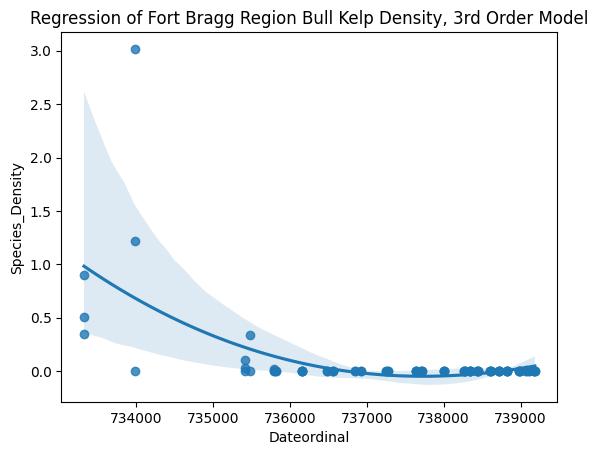

In [79]:
regplot = sns.regplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Site.str.contains('Caspar')],x='Dateordinal',y='Species_Density', order=3)
plt.title('Regression of Fort Bragg Region Bull Kelp Density, 3rd Order Model')

plt.show()

In [80]:
ftbrgg_kelpdensity

,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2,Species_Density,Dateordinal
190,Albion Cove,39.227780,2018-05-08,2018,Bull Kelp,47,0.0,47.0,180.0,360.0,0.130556,736822
197,Albion Cove,39.227780,2018-05-08,2018,Torn Kelp,0,0.0,0.0,180.0,360.0,0.000000,736822
198,Albion Cove,39.227780,2018-05-08,2018,Woody Kelp,253,0.0,253.0,156.1,312.2,0.810378,736822
199,Albion Cove,39.227780,2019-05-04,2019,Bull Kelp,0,0.0,0.0,180.0,360.0,0.000000,737183
206,Albion Cove,39.227780,2019-05-04,2019,Torn Kelp,94,0.0,94.0,168.0,336.0,0.279762,737183
...,...,...,...,...,...,...,...,...,...,...,...,...
10799,Van Damme,39.271915,2023-10-28,2023,Giant Kelp,0,0.0,0.0,180.0,360.0,0.000000,738821
10806,Van Damme,39.271915,2023-10-28,2023,Woody Kelp,0,0.0,0.0,180.0,360.0,0.000000,738821
10807,Van Damme,39.271915,2024-10-24,2024,Bull Kelp,0,0.0,0.0,180.0,360.0,0.000000,739183
10809,Van Damme,39.271915,2024-10-24,2024,Giant Kelp,0,0.0,0.0,180.0,360.0,0.000000,739183


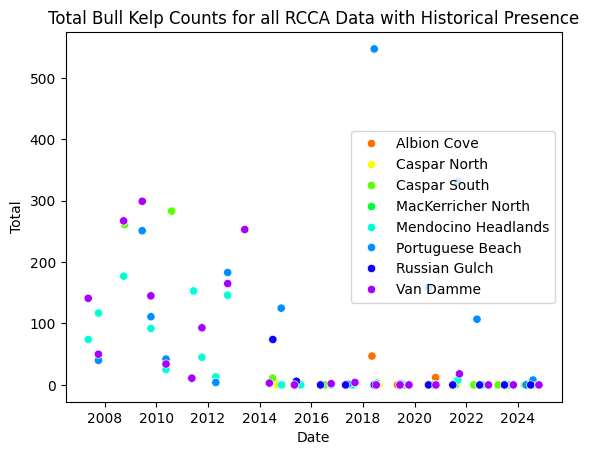

In [81]:
sns.scatterplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp'], x='Date',y='Total', hue='Site', palette='gist_rainbow')

plt.title('Total Bull Kelp Counts for all RCCA Data with Historical Presence')
plt.legend(loc='center right')

plt.show()

In [82]:
ftbrgg_bullkelp = ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp']

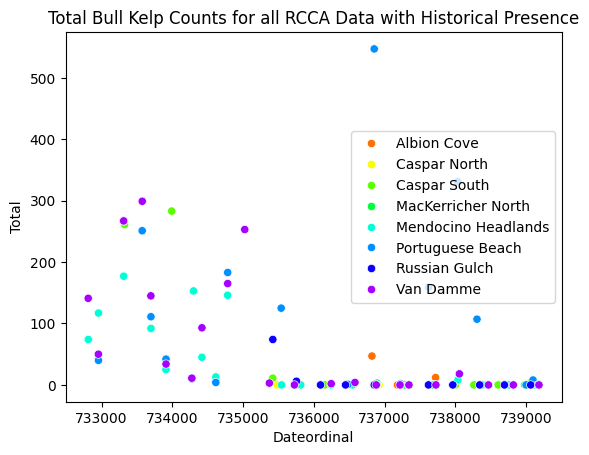

In [83]:
sns.scatterplot(ftbrgg_bullkelp, x='Dateordinal',y='Total', hue='Site', palette='gist_rainbow')

plt.title('Total Bull Kelp Counts for all RCCA Data with Historical Presence')
plt.legend(loc='center right')

plt.show()

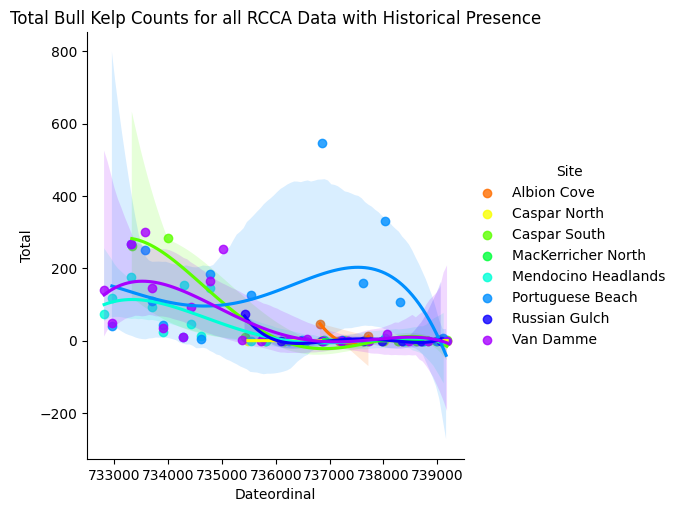

In [84]:
sns.lmplot(data=ftbrgg_bullkelp, x='Dateordinal', y='Total', hue='Site', 
           palette='gist_rainbow', order=4)

plt.title('Total Bull Kelp Counts for all RCCA Data with Historical Presence')
plt.show()

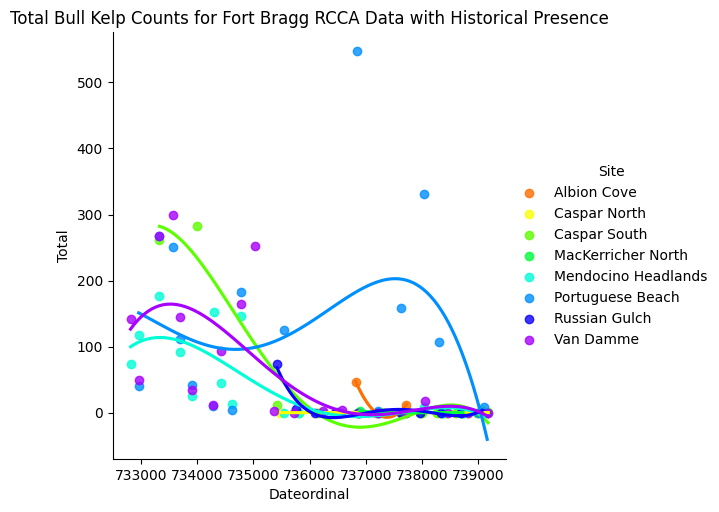

In [85]:
sns.lmplot(data=ftbrgg_bullkelp, x='Dateordinal', y='Total', hue='Site', 
           palette='gist_rainbow', order=4, ci=None)

plt.title('Total Bull Kelp Counts for Fort Bragg RCCA Data with Historical Presence')
plt.show()

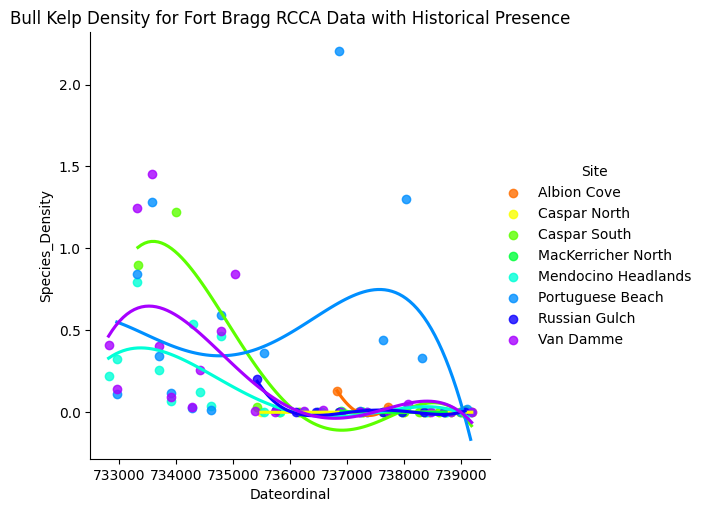

In [86]:

sns.lmplot(data=ftbrgg_bullkelp, x='Dateordinal', y='Species_Density', hue='Site', 
           palette='gist_rainbow', order=4, ci=None)

plt.title('Bull Kelp Density for Fort Bragg RCCA Data with Historical Presence')
plt.show()



In [87]:
bullkelp_rcca = kelp_rcca_group[kelp_rcca_group.Classcode.str.contains('Bull')]
bullkelp_rcca

,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2,Species_Density,Dateordinal,Total_Count_Site,n_N
140,Albion Cove,39.227780,2018-05-08,2018,Bull Kelp,47,0.0,47.0,180.0,360.0,0.130556,736822,300.0,0.024103
143,Albion Cove,39.227780,2019-05-04,2019,Bull Kelp,0,0.0,0.0,180.0,360.0,0.000000,737183,243.0,-0.000000
146,Albion Cove,39.227780,2020-10-24,2020,Bull Kelp,12,0.0,12.0,180.0,360.0,0.033333,737722,169.0,0.004649
149,Andrew Molera,36.278454,2015-06-23,2015,Bull Kelp,3,0.0,3.0,180.0,360.0,0.008333,735772,1295.0,0.000004
154,Andrew Molera,36.278454,2017-06-27,2017,Bull Kelp,0,0.0,0.0,180.0,360.0,0.000000,736507,2368.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6737,White Rocks,35.527756,2018-06-21,2018,Bull Kelp,18,0.0,18.0,180.0,360.0,0.050000,736866,659.0,0.000706
6741,White Rocks,35.527756,2019-06-20,2019,Bull Kelp,151,0.0,151.0,153.6,307.2,0.491536,737230,663.0,0.051606
6745,White Rocks,35.527756,2021-09-17,2021,Bull Kelp,92,0.0,92.0,180.0,360.0,0.255556,738050,826.0,0.012286
6749,White Rocks,35.527756,2022-06-23,2022,Bull Kelp,24,0.0,24.0,180.0,360.0,0.066667,738329,383.0,0.003773


In [88]:
nobull_yesbull = bullkelp_rcca.groupby('Site')['Total'].sum()>100

lotsofbull = bullkelp_rcca[bullkelp_rcca['Site'].isin(nobull_yesbull[nobull_yesbull].index)]

In [89]:
lotsofbull

,Site,Latitude,Date,Year,Classcode,Amount,Stipes,Total,Distance,Area_m2,Species_Density,Dateordinal,Total_Count_Site,n_N
149,Andrew Molera,36.278454,2015-06-23,2015,Bull Kelp,3,0.0,3.0,180.0,360.0,0.008333,735772,1295.0,0.000004
154,Andrew Molera,36.278454,2017-06-27,2017,Bull Kelp,0,0.0,0.0,180.0,360.0,0.000000,736507,2368.0,-0.000000
159,Andrew Molera,36.278454,2018-06-19,2018,Bull Kelp,0,0.0,0.0,180.0,360.0,0.000000,736864,1936.0,-0.000000
165,Andrew Molera,36.278454,2019-06-18,2019,Bull Kelp,85,0.0,85.0,180.0,360.0,0.236111,737228,877.0,0.009294
171,Andrew Molera,36.278454,2021-08-24,2021,Bull Kelp,22,0.0,22.0,180.0,360.0,0.061111,738026,1916.0,0.000126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6737,White Rocks,35.527756,2018-06-21,2018,Bull Kelp,18,0.0,18.0,180.0,360.0,0.050000,736866,659.0,0.000706
6741,White Rocks,35.527756,2019-06-20,2019,Bull Kelp,151,0.0,151.0,153.6,307.2,0.491536,737230,663.0,0.051606
6745,White Rocks,35.527756,2021-09-17,2021,Bull Kelp,92,0.0,92.0,180.0,360.0,0.255556,738050,826.0,0.012286
6749,White Rocks,35.527756,2022-06-23,2022,Bull Kelp,24,0.0,24.0,180.0,360.0,0.066667,738329,383.0,0.003773


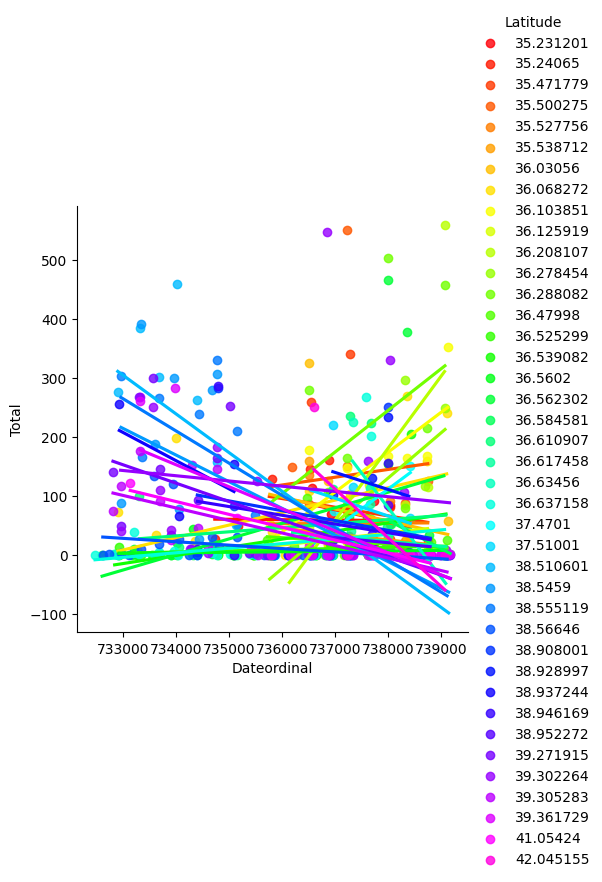

In [90]:
sns.lmplot(lotsofbull, x='Dateordinal',y='Total', hue='Latitude', palette='gist_rainbow', ci=None)